In [1]:
# –∑–∞–≥—Ä—É–∑–∫–∞ –±–∏–±–ª–∏–æ—Ç–µ–∫

# –º–µ—Ç–æ–¥—ã –¥–ª—è –æ—Ç—Ä–∏—Å–æ–≤–∫–∏ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π
from PIL import Image, ImageEnhance

# –î–ª—è –æ—Ç—Ä–∏—Å–æ–≤–∫–∏ –≥—Ä–∞—Ñ–∏–∫–æ–≤
import matplotlib.pyplot as plt

# –î–ª—è –≥–µ–Ω–µ—Ä–∞—Ü–∏–∏ —Å–ª—É—á–∞–π–Ω—ã—Ö —á–∏—Å–µ–ª
import random

# –ë–∏–±–ª–∏–æ—Ç–µ–∫–∞ —Ä–∞–±–æ—Ç—ã —Å –º–∞—Å—Å–∏–≤–∞–º–∏
import numpy as np
import pandas as pd

# –î–ª—è —Ä–∞–±–æ—Ç—ã —Å —Ñ–∞–π–ª–∞–º–∏
import os
from os import listdir

# –ú–æ–¥—É–ª—å Garbage Collector - –¥–ª—è –ø–æ–º–æ—â–∏ –≤ –æ—Å–≤–æ–±–æ–∂–¥–µ–Ω–∏–∏ –ø–∞–º—è—Ç–∏ (–£–¥–∞–ª—è–µ—Ç –ª–∏—à–Ω–∏–µ/–Ω–µ–∏—Å–ø–æ–ª—å–∑—É–µ–º—ã–µ –¥–∞–Ω–Ω—ã–µ)
import gc

# –∏–º–ø–æ—Ä—Ç–∏—Ä—É–µ–º –º–æ–¥—É–ª—å –¥–ª—è –∑–∞–≥—Ä—É–∑–∫–∏ –¥–∞–Ω–Ω—ã—Ö
import gdown

# –¥–ª—è —Ä–∞–∑–¥–µ–ª–µ–Ω–∏—è –≤—ã–±–æ—Ä–æ–∫
from sklearn.model_selection import train_test_split

# —Å–æ–∑–¥–∞–Ω–∏–µ –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ–π –º–æ–¥–µ–ª–∏
from tensorflow.keras.models import Sequential

# —Å–ª–æ–∏ –Ω–µ–π—Ä–æ–Ω–Ω–æ–π —Å–µ—Ç–∏
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization

# –†–∞–±–æ—Ç–∞ —Å –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è–º–∏
#from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

# –æ–ø—Ç–∏–º–∏–∑–∞—Ç–æ—Ä
from tensorflow.keras.optimizers import Adam

# –∏–º–ø–æ—Ä—Ç tensorflow
import tensorflow as tf

# –º–æ–¥—É–ª—å –¥–ª—è –æ—Ç—Å—á–µ—Ç–∞ –≤—Ä–µ–º–µ–Ω–∏
import time

# –î–ª—è –æ—Ç—Ä–∏—Å–æ–≤–∫–∏ –≥—Ä–∞—Ñ–∏–∫–æ–≤
import seaborn as sns
import warnings

In [3]:
# –ó–∞–≥—Ä—É–∑–∫–∞ –¥–∞—Ç–∞—Å–µ—Ç–æ–≤ –∏–∑ –æ–±–ª–∞–∫–∞
gdown.download('https://lodmedia.hb.bizmrg.com/case_files/1128568/train_dataset_soc_dem_train.zip', None, quiet=True)
!unzip -q "/content/train_dataset_soc_dem_train.zip" -d /content/ # –ø–æ–¥–≥—Ä—É–∑–∏–º –±–∞–∑—É –≤ –Ω–æ—É—Ç–±—É–∫ –≤ –¥–∏—Ä–µ–∫—Ç–æ—Ä–∏—é 'content/'

In [52]:
path = "" #... # –í–∞—à –ø—É—Ç—å –¥–æ –¥–∏—Ä–µ–∫—Ç–æ—Ä–∏–∏ —Å –¥–∞–Ω–Ω—ã–º–∏ /path/to/data/
data = pd.read_csv(path + 'train_events.csv')
video = pd.read_csv(path + 'video_info_v2.csv')
targets = pd.read_csv(path + 'train_targets.csv')
full_data = pd.read_csv(path + 'all_events.csv')
regi = pd.read_csv(path + 'region.csv')

## **–î–∞–Ω–Ω—ã–µ –¥–ª—è –∑–∞–¥–∞—á–∏ ¬´–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ —Å–æ—Ü–∏–∞–ª—å–Ω–æ-–¥–µ–º–æ–≥—Ä–∞—Ñ–∏—á–µ—Å–∫–∏—Ö —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è¬ª**

–î–∞–Ω–Ω—ã–µ –¥–ª—è –∑–∞–¥–∞—á–∏ ¬´–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ —Å–æ—Ü–∏–∞–ª—å–Ω–æ–¥–µ–º–æ–≥—Ä–∞—Ñ–∏—á–µ—Å–∫–∏—Ö —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è¬ª —Å–æ—Å—Ç–æ—è—Ç –∏–∑
—Å–ª–µ–¥—É—é—â–∏—Ö —Ç–∞–±–ª–∏—Ü:
1. all_events.csv‚Äî –î–∞–Ω–Ω—ã–µ —Å –∏—Å—Ç–æ—Ä–∏–µ–π –ø—Ä–æ—Å–º–æ—Ç—Ä–æ–≤ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π
–û–ø–∏—Å–∞–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤:
viewer_uid: id –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è
rutube_video_id: id –≤–∏–¥–µ–æ
event_timestamp: –î–∞—Ç–∞
—Å–æ–±—ã—Ç–∏—è
region: –†–µ–≥–∏–æ–Ω
ua_device_type: –¢–∏–ø —É—Å—Ç—Ä–æ–π—Å—Ç–≤–∞ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è
ua_client_type: –ë—Ä–∞—É–∑–µ—Ä/–ø—Ä–∏–ª–æ–∂–µ–Ω–∏–µ
ua_os: –ù–∞–∑–≤–∞–Ω–∏–µ –æ–ø–µ—Ä–∞—Ü–∏–æ–Ω–Ω–æ–π —Å–∏—Å—Ç–µ–º—ã –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è
ua_client_name: –ù–∞–∑–≤–∞–Ω–∏–µ –±—Ä–∞—É–∑–µ—Ä–∞ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è
total_watchtime: –í—Ä–µ–º—è –ø—Ä–æ—Å–º–æ—Ç—Ä–∞ –≤ —Å–µ–∫—É–Ω–¥–∞—Ö
–ü—Ä–∏–º.: –í –∫–æ–ª–æ–Ω–∫–µ event_timestamp —É–∫–∞–∑–∞–Ω–æ –º–æ—Å–∫–æ–≤—Å–∫–æ–µ
–≤—Ä–µ–º—è (GMT +3). –ò—Å–ø–æ–ª—å–∑—É–π—Ç–µ –¥–∞–Ω–Ω—ã–µ –∏–∑ region, —á—Ç–æ–±—ã
–ø—Ä–∏–≤–µ—Å—Ç–∏ –≤—Ä–µ–º—è –∫ —Ä–µ–≥–∏–æ–Ω–∞–ª—å–Ω–æ–º—É
2. train_events.csv ‚Äî –î–∞–Ω–Ω—ã–µ —Å –∏—Å—Ç–æ—Ä–∏–µ–π –ø—Ä–æ—Å–º–æ—Ç—Ä–æ–≤ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π —Å –∏–∑–≤–µ—Å—Ç–Ω—ã–º–∏
—Ü–µ–ª–µ–≤—ã–º–∏ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–º–∏
–û–ø–∏—Å–∞–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤:
event_ timestamp: –î–∞—Ç–∞
—Å–æ–±—ã—Ç–∏—è
viewer_uid: id –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è
rutube_video_id: id –≤–∏–¥–µ–æ
region: –†–µ–≥–∏–æ–Ω
ua_device_type: –¢–∏–ø —É—Å—Ç—Ä–æ–π—Å—Ç–≤–∞ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è
ua_client_type: –ë—Ä–∞—É–∑–µ—Ä/–ø—Ä–∏–ª–æ–∂–µ–Ω–∏–µ
ua_os: –ù–∞–∑–≤–∞–Ω–∏–µ –æ–ø–µ—Ä–∞—Ü–∏–æ–Ω–Ω–æ–π —Å–∏—Å—Ç–µ–º—ã –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è
ua_client_name: –ù–∞–∑–≤–∞–Ω–∏–µ –±—Ä–∞—É–∑–µ—Ä–∞ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è
total_watchtime: –í—Ä–µ–º—è –ø—Ä–æ—Å–º–æ—Ç—Ä–∞ –≤ —Å–µ–∫—É–Ω–¥–∞—Ö
–ü—Ä–∏–º.: –í –∫–æ–ª–æ–Ω–∫–µ event_timestamp —É–∫–∞–∑–∞–Ω–æ –º–æ—Å–∫–æ–≤—Å–∫–æ–µ
–≤—Ä–µ–º—è (GMT +3). –ò—Å–ø–æ–ª—å–∑—É–π—Ç–µ –¥–∞–Ω–Ω—ã–µ –∏–∑ region, —á—Ç–æ–±—ã
–ø—Ä–∏–≤–µ—Å—Ç–∏ –≤—Ä–µ–º—è –∫ —Ä–µ–≥–∏–æ–Ω–∞–ª—å–Ω–æ–º—É
3. video_info.csv ‚Äî –î–∞–Ω–Ω—ã–µ —Å –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–µ–π –æ –≤–∏–¥–µ–æ
–û–ø–∏—Å–∞–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤:
rutube_video_id: id –≤–∏–¥–µ–æ
title: –Ω–∞–∑–≤–∞–Ω–∏–µ –≤–∏–¥–µ–æ
duration: –¥–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å –≤–∏–¥–µ–æ –≤ –º–∏–ª–ª–∏—Å–µ–∫—É–Ω–¥–∞—Ö
author_id: id –∞–≤—Ç–æ—Ä–∞ –≤–∏–¥–µ–æ
category: –∫–∞—Ç–µ–≥–æ—Ä–∏—è –≤–∏–¥–µ–æ
4. train_targets.csv ‚Äî –¶–µ–ª–µ–≤—ã–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π –∏–∑ —Ç–∞–±–ª–∏—Ü—ã train_events
–û–ø–∏—Å–∞–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤:
viewer_uid: id –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è
age: –≤–æ–∑—Ä–∞—Å—Ç –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è
sex: –ü–æ–ª –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è
age_class: –≤–æ–∑—Ä–∞—Å—Ç–Ω–∞—è –∫–∞—Ç–µ–≥–æ—Ä–∏—è –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è
–ü—Ä–∏–º.: –í–æ–∑—Ä–∞—Å—Ç–Ω—ã–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ —Ä–∞–∑–¥–µ–ª–µ–Ω—ã —Å–ª–µ–¥—É—é—â–∏–º –æ–±—Ä–∞–∑–æ–º:
0 ‚Äì (9, 20] (–ª–µ—Ç)
1 ‚Äì (20, 30] (–ª–µ—Ç)
2 ‚Äì (30, 40] (–ª–µ—Ç)
3 ‚Äì (40, 60] (–ª–µ—Ç)
–í—ã –º–æ–∂–µ—Ç–µ –æ–±—É—á–∞—Ç—å –∞–ª–≥–æ—Ä–∏—Ç–º –≤ –∑–∞–¥–∞—á–µ –º—É–ª—å—Ç–∏–∫–ª–∞—Å—Å–æ–≤–æ–π –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ –≤–æ–∑—Ä–∞—Å—Ç–Ω–æ–π –≥—Ä—É–ø–ø—ã,
–Ω–æ —Ç–∞–∫–∂–µ –∏ –≤ –∑–∞–¥–∞—á–µ —Ä–µ–≥—Ä–µ—Å—Å–∏–∏, —Å–∞–º–æ—Å—Ç–æ—è—Ç–µ–ª—å–Ω–æ –æ–ø—Ä–µ–¥–µ–ª–∏–≤ –∫–∞—Ç–µ–≥–æ—Ä–∏—é –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è –ø–æ
–ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω–æ–º—É –∫–æ–ª–∏—á–µ—Å—Ç–≤—É –ª–µ—Ç.
5. sample_submission.csv ‚Äî –ü—Ä–∏–º–µ—Ä —Ç–∞–±–ª–∏—Ü—ã —Å –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è–º–∏ –º–æ–¥–µ–ª–∏ —É—á–∞—Å—Ç–Ω–∏–∫–æ–≤
–û–ø–∏—Å–∞–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤:
viewer_uid: id –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è –∏–∑ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∏
sex: –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–π –ø–æ–ª –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è
age_class: –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω–∞—è –≤–æ–∑—Ä–∞—Å—Ç–Ω–∞—è –∫–∞—Ç–µ–≥–æ—Ä–∏—è –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª

In [75]:
full_data # –î–∞–Ω–Ω—ã–µ —Å –∏—Å—Ç–æ—Ä–∏–µ–π –ø—Ä–æ—Å–º–æ—Ç—Ä–æ–≤ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π

event_timestamp                  region ua_device_type  \
0        2024-06-01 13:08:30+03:00      Tatarstan Republic     smartphone   
1        2024-06-01 14:30:00+03:00  Bashkortostan Republic     smartphone   
2        2024-06-01 18:48:12+03:00      Novosibirsk Oblast     smartphone   
3        2024-06-01 16:32:36+03:00                  Moscow        desktop   
4        2024-06-01 00:57:04+03:00           Moscow Oblast     smartphone   
...                            ...                     ...            ...   
8439619  2024-06-30 18:12:06+03:00  Nizhny Novgorod Oblast     smartphone   
8439620  2024-06-30 09:23:08+03:00             Chelyabinsk     smartphone   
8439621  2024-06-30 10:57:36+03:00          Krasnodar Krai     smartphone   
8439622  2024-06-30 18:16:55+03:00                  Moscow     smartphone   
8439623  2024-06-30 01:02:17+03:00          Krasnodar Krai     smartphone   

        ua_client_type    ua_os  ua_client_name  total_watchtime  \
0              browser  Android   Chrome Mobile               60   
1           mobile app  Android          Rutube               60   
2           mobile app  Android          Rutube              121   
3              browser  Windows  Yandex Browser             2324   
4           mobile app  Android          Rutube             6830   
...                ...      ...             ...              ...   
8439619     mobile app  Android          Rutube             1735   
8439620     mobile app  Android          Rutube             4766   
8439621     mobile app  Android          Rutube              890   
8439622        browser  Android  Yandex Browser             2504   
8439623     mobile app  Android          Rutube             3601   

        rutube_video_id  viewer_uid  
0          video_395879    10813370  
1          video_216518    10512324  
2           video_41225    10951137  
3          video_215886    10912434  
4           video_43631    10223585  
...                 ...         ...  
8439619    video_163270    10687999  
8439620    video_433627    10425804  
8439621     video_11911    10565147  
8439622    video_252573    10715847  
8439623    video_477884    10914672  

[8439624 rows x 9 columns]

In [76]:
data  #–î–∞–Ω–Ω—ã–µ —Å –∏—Å—Ç–æ—Ä–∏–µ–π –ø—Ä–æ—Å–º–æ—Ç—Ä–æ–≤ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π —Å –∏–∑–≤–µ—Å—Ç–Ω—ã–º–∏ —Ü–µ–ª–µ–≤—ã–º–∏ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–º–∏

event_timestamp                  region ua_device_type  \
0        2024-06-01 06:40:58+03:00             Chelyabinsk        desktop   
1        2024-06-01 19:33:24+03:00  Bashkortostan Republic     smartphone   
2        2024-06-01 21:30:43+03:00          St.-Petersburg        desktop   
3        2024-06-01 23:03:42+03:00                  Moscow     smartphone   
4        2024-06-01 22:48:09+03:00                  Moscow     smartphone   
...                            ...                     ...            ...   
1759611  2024-06-30 17:08:36+03:00                  Moscow     smartphone   
1759612  2024-06-30 01:20:16+03:00                  Moscow     smartphone   
1759613  2024-06-30 22:37:04+03:00          St.-Petersburg        desktop   
1759614  2024-06-30 11:33:09+03:00          St.-Petersburg     smartphone   
1759615  2024-06-30 23:51:52+03:00             Chelyabinsk     smartphone   

        ua_client_type    ua_os  ua_client_name  total_watchtime  \
0              browser  Windows  Yandex Browser             1883   
1           mobile app  Android          Rutube              512   
2              browser  Windows          Chrome             5647   
3           mobile app  Android          Rutube             1521   
4           mobile app  Android          Rutube               71   
...                ...      ...             ...              ...   
1759611     mobile app  Android          Rutube             4230   
1759612        browser  Android  Firefox Mobile              382   
1759613        browser  Windows  Microsoft Edge             1342   
1759614     mobile app  Android          Rutube              801   
1759615     mobile app  Android          Rutube              474   

        rutube_video_id  viewer_uid  
0          video_133074    10067243  
1          video_362960    10245341  
2           video_96775    10894333  
3          video_161610    10029092  
4          video_116245    10452976  
...                 ...         ...  
1759611    video_162776    10026914  
1759612    video_316157    10417567  
1759613     video_83304    10009094  
1759614    video_132769    10574374  
1759615     video_19793    10851586  

[1759616 rows x 9 columns]

In [77]:
video

rutube_video_id                                              title  \
0         video_185549  –ö–∞–∫ —Å–æ–±—Ä–∞—Ç—å –±—É–∫–µ—Ç –∏–∑ –º—ã–ª—å–Ω—ã—Ö —Ç—é–ª—å–ø–∞–Ω–æ–≤ - –°–∏–ª–∏–∫...   
1         video_111035        –û—Å—Ç–æ—Ä–æ–∂–Ω–æ, –ö–∏–±–µ—Ä–∑–µ–º–ª—è–Ω–µ!, 1 —Å–µ–∑–æ–Ω, 12 —Å–µ—Ä–∏—è   
2         video_476517  –ü–û–ü–£–õ–Ø–†–ù–´–ï –í–ò–î–ï–û–ò–ì–†–´ –≤ LEGO... –ø–µ—Ä–µ–≤–æ–¥ - TD BR...   
3         video_157198                         –•–æ—Ä–æ—à–∏–π –ª–∂–µ—Ü (—Ñ–∏–ª—å–º, 2019)   
4         video_289824                   –ù–∞—à–µ–≥–æ —Å—Ç–∞—Ä–æ–≥–æ –≥–Ω–æ–±—è—Ç –ø–æ-–≤—Å—è–∫–æ–º—É   
...                ...                                                ...   
481475    video_196126                          14. Landscape Layer Blend   
481476    video_390909         –†–∏—Ö–∞—Ä–¥ –®—Ç—Ä–∞—É—Å: –ó–∞–≤—Ç—Ä–∞! ‚Äî –õ—é–¥–º–∏–ª–∞ –†—É–±–∏–Ω—Å–∫–∞—è   
481477    video_326364  –ü–æ–π–º–∞–π –¢–∏–Ω–∏–ø–∏–Ω! –ö–æ—Ä–æ–ª–µ–≤—Å—Ç–≤–æ —ç–º–æ—Ü–∏–π, 2 —Å–µ—Ä–∏—è. –°...   
481478    video_374957   –í–û–†–ö–£–¢–ê. 1 –°–ï–†–ò–Ø. –£–ñ–ê–°–´. –ü–°–ò–•–û–õ–û–ì–ò–ß–ï–°–ö–ò–ô –¢–†–ò–õ–õ–ï–†   
481479     video_29223  –¶–µ—Ä–µ–º–æ–Ω–∏—è –≤—Ä—É—á–µ–Ω–∏—è –ù–∞—Ü–∏–æ–Ω–∞–ª—å–Ω–æ–π –¥–µ—Ç—Å–∫–æ–π –ø—Ä–µ–º–∏–∏...   

            category  duration  author_id  
0              –•–æ–±–±–∏   1559160    1015054  
1            –°–µ—Ä–∏–∞–ª—ã   1320007    1002180  
2              –•–æ–±–±–∏    606145    1095337  
3             –§–∏–ª—å–º—ã   6577440    1043618  
4        –†–∞–∑–≤–ª–µ—á–µ–Ω–∏—è    859493    1009535  
...              ...       ...        ...  
481475        –î–∏–∑–∞–π–Ω    462000    1121338  
481476        –ú—É–∑—ã–∫–∞    227628    1043510  
481477   –ú—É–ª—å—Ç—Ñ–∏–ª—å–º—ã    744576    1002799  
481478  –õ—é–¥–∏ –∏ –±–ª–æ–≥–∏   2597385    1008386  
481479         –î–µ—Ç—è–º   5976166    1026149  

[481480 rows x 5 columns]

In [79]:
targets

viewer_uid  age     sex  age_class
0         10087154   30    male          1
1         10908708   25  female          1
2         10190464   34    male          2
3         10939673   25    male          1
4         10288257   48    male          3
...            ...  ...     ...        ...
180007    10237402   43  female          3
180008    10796936   32    male          2
180009    10684284   28    male          1
180010    10031093   50  female          3
180011    10035024   26  female          1

[180012 rows x 4 columns]

## **EDA**

In [5]:
# —Å–º–æ—Ç—Ä–∏–º –ø—Ä–æ–ø—É—à–µ–Ω–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ
full_data.isna().sum(axis=0)

event_timestamp         0
region                  0
ua_device_type          0
ua_client_type         13
ua_os              519630
ua_client_name         13
total_watchtime         0
rutube_video_id         0
viewer_uid              0
dtype: int64

In [80]:
# —Å–º–æ—Ç—Ä–∏–º –ø—Ä–æ–ø—É—à–µ–Ω–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ
data.isna().sum(axis=0)

event_timestamp         0
region                  0
ua_device_type          0
ua_client_type          0
ua_os              117671
ua_client_name          0
total_watchtime         0
rutube_video_id         0
viewer_uid              0
dtype: int64

In [25]:
#—Å–æ–±–∏—Ä–∞–µ–º —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã–π –¥–∞—Ç–∞—Å–µ—Ç
df_merged = targets.merge(data, on='viewer_uid', how='outer')
data_video=df_merged.merge(video[['rutube_video_id','author_id','title','category','duration']], how='left')
data_video

viewer_uid  age     sex  age_class            event_timestamp  \
0          10087154   30    male          1  2024-06-24 18:27:25+03:00   
1          10087154   30    male          1  2024-06-25 18:50:57+03:00   
2          10908708   25  female          1  2024-06-05 15:27:59+03:00   
3          10908708   25  female          1  2024-06-21 12:27:23+03:00   
4          10908708   25  female          1  2024-06-21 12:16:26+03:00   
...             ...  ...     ...        ...                        ...   
1759611    10035024   26  female          1  2024-06-30 06:28:25+03:00   
1759612    10035024   26  female          1  2024-06-30 11:35:17+03:00   
1759613    10035024   26  female          1  2024-06-30 09:53:23+03:00   
1759614    10035024   26  female          1  2024-06-30 13:41:39+03:00   
1759615    10035024   26  female          1  2024-06-30 12:18:40+03:00   

                     region ua_device_type ua_client_type    ua_os  \
0          Krasnoyarsk Krai     smartphone     mobile app  Android   
1        Novosibirsk Oblast     smartphone     mobile app  Android   
2            St.-Petersburg     smartphone     mobile app  Android   
3             Moscow Oblast     smartphone     mobile app  Android   
4             Moscow Oblast     smartphone     mobile app  Android   
...                     ...            ...            ...      ...   
1759611        Tomsk Oblast     smartphone     mobile app  Android   
1759612        Tomsk Oblast     smartphone     mobile app  Android   
1759613        Tomsk Oblast     smartphone     mobile app  Android   
1759614        Tomsk Oblast     smartphone     mobile app  Android   
1759615        Tomsk Oblast     smartphone     mobile app  Android   

        ua_client_name  total_watchtime rutube_video_id  author_id  \
0               Rutube              511     video_47774    1034175   
1               Rutube              531     video_47774    1034175   
2               Rutube               68    video_434445    1017256   
3               Rutube              581    video_105981    1017256   
4               Rutube              631     video_26272    1017256   
...                ...              ...             ...        ...   
1759611         Rutube             1119    video_251738    1120873   
1759612         Rutube             2591     video_86180    1120873   
1759613         Rutube             2590    video_150355    1120873   
1759614         Rutube             2591     video_28173    1120873   
1759615         Rutube             2570    video_135054    1120873   

                                                     title     category  \
0        –û–Ω–∏ –∑–≤–µ—Ä–∏, –∞ –º—ã ‚Äî –Ω–µ—Ç // –î–º–∏—Ç—Ä–∏–π –ü—É—á–∫–æ–≤ –ø—Ä–æ —É–≥...     –ò–Ω—Ç–µ—Ä–≤—å—é   
1        –û–Ω–∏ –∑–≤–µ—Ä–∏, –∞ –º—ã ‚Äî –Ω–µ—Ç // –î–º–∏—Ç—Ä–∏–π –ü—É—á–∫–æ–≤ –ø—Ä–æ —É–≥...     –ò–Ω—Ç–µ—Ä–≤—å—é   
2                     –´–†–ö–ê, –õ–ï–®–ò–ô, –ë–ê–ö–£ –ò –ñ–£–¢–ö–ê–Ø –ù–û–ß–ï–í–ö–ê !  –†–∞–∑–≤–ª–µ—á–µ–Ω–∏—è   
3        –´–†–ö–ê! –ù–ò–ö–û–ì–î–ê –ù–ï –†–ê–ó–ì–û–í–ê–†–ò–í–ê–ô –° –ù–ò–ú! –≠–¢–û –ö–û–ù–ï–¶...  –†–∞–∑–≤–ª–µ—á–µ–Ω–∏—è   
4                                        –°–û–ù–Ø –°–¢–ê–õ–ê –´–†–ö–û–ô!  –†–∞–∑–≤–ª–µ—á–µ–Ω–∏—è   
...                                                    ...          ...   
1759611  –°–µ—Ä–∏–∞–ª –≠–ª–µ–º–µ–Ω—Ç–∞—Ä–Ω–æ - 1 –°–µ–∑–æ–Ω 1 –°–µ—Ä–∏—è  / Elemen...      –°–µ—Ä–∏–∞–ª—ã   
1759612  –°–µ—Ä–∏–∞–ª –≠–ª–µ–º–µ–Ω—Ç–∞—Ä–Ω–æ - 1 –°–µ–∑–æ–Ω 4 –°–µ—Ä–∏—è  / Elemen...      –°–µ—Ä–∏–∞–ª—ã   
1759613  –°–µ—Ä–∏–∞–ª –≠–ª–µ–º–µ–Ω—Ç–∞—Ä–Ω–æ - 1 –°–µ–∑–æ–Ω 3 –°–µ—Ä–∏—è  / Elemen...      –°–µ—Ä–∏–∞–ª—ã   
1759614  –°–µ—Ä–∏–∞–ª –≠–ª–µ–º–µ–Ω—Ç–∞—Ä–Ω–æ - 1 –°–µ–∑–æ–Ω 6 –°–µ—Ä–∏—è  / Elemen...      –°–µ—Ä–∏–∞–ª—ã   
1759615  –°–µ—Ä–∏–∞–ª –≠–ª–µ–º–µ–Ω—Ç–∞—Ä–Ω–æ - 1 –°–µ–∑–æ–Ω 5 –°–µ—Ä–∏—è  / Elemen...      –°–µ—Ä–∏–∞–ª—ã   

         duration  
0         4696127  
1         4696127  
2          601003  
3          593920  
4          658240  
...           ...  
1759611   2744286  
1759612   25

In [6]:
freg=full_data['region'].value_counts()
freg

region
Moscow                      1787982
St.-Petersburg               566934
Moscow Oblast                474697
Sverdlovsk Oblast            333532
Samara Oblast                313082
                             ...   
Smolensk                        471
Jewish Autonomous Oblast        433
Stavropol Krai                  418
Astrakhan                       398
Arkhangelsk Oblast              109
Name: count, Length: 116, dtype: int64

In [72]:
freg.to_csv('region.csv')

In [7]:
fdev=full_data['ua_device_type'].value_counts()
fdev

ua_device_type
smartphone    6439053
desktop       1638069
tablet         362502
Name: count, dtype: int64

In [8]:
fcli=full_data['ua_client_type'].value_counts()
fcli

ua_client_type
mobile app    5422565
browser       3016838
av                208
Name: count, dtype: int64

In [9]:
fosa=full_data['ua_os'].value_counts()
fosa

ua_os
Android                 5846495
Windows                 1492259
iOS                      429418
Mac                      121609
GNU/Linux                 22654
iPadOS                     4418
Ubuntu                     1535
android tv                  758
Windows Phone               162
Fire OS                     121
HarmonyOS                   118
MeeGo                        84
BlackBerry OS                81
BlackBerry Tablet OS         80
Symbian                      53
Windows CE                   49
KaiOS                        34
Fedora                       24
CyanogenMod                  23
MocorDroid                    7
Windows RT                    4
SUSE                          3
Solaris                       2
Symbian OS Series 60          1
Kubuntu                       1
Chrome OS                     1
Name: count, dtype: int64

In [10]:
fclinam=full_data['ua_client_name'].value_counts()
fclinam

ua_client_name
Rutube              5415545
Chrome               822447
Yandex Browser       701136
Chrome Mobile        674439
Mobile Safari        226530
                     ...   
Stargon                   1
Petal Search App          1
Phoenix Browser           1
Puffin                    1
Facebook                  1
Name: count, Length: 106, dtype: int64

In [12]:
data_video


viewer_uid  age     sex  age_class            event_timestamp  \
0          10087154   30    male          1  2024-06-24 18:27:25+03:00   
1          10087154   30    male          1  2024-06-25 18:50:57+03:00   
2          10908708   25  female          1  2024-06-05 15:27:59+03:00   
3          10908708   25  female          1  2024-06-21 12:27:23+03:00   
4          10908708   25  female          1  2024-06-21 12:16:26+03:00   
...             ...  ...     ...        ...                        ...   
1759611    10035024   26  female          1  2024-06-30 06:28:25+03:00   
1759612    10035024   26  female          1  2024-06-30 11:35:17+03:00   
1759613    10035024   26  female          1  2024-06-30 09:53:23+03:00   
1759614    10035024   26  female          1  2024-06-30 13:41:39+03:00   
1759615    10035024   26  female          1  2024-06-30 12:18:40+03:00   

                     region ua_device_type ua_client_type    ua_os  \
0          Krasnoyarsk Krai     smartphone     mobile app  Android   
1        Novosibirsk Oblast     smartphone     mobile app  Android   
2            St.-Petersburg     smartphone     mobile app  Android   
3             Moscow Oblast     smartphone     mobile app  Android   
4             Moscow Oblast     smartphone     mobile app  Android   
...                     ...            ...            ...      ...   
1759611        Tomsk Oblast     smartphone     mobile app  Android   
1759612        Tomsk Oblast     smartphone     mobile app  Android   
1759613        Tomsk Oblast     smartphone     mobile app  Android   
1759614        Tomsk Oblast     smartphone     mobile app  Android   
1759615        Tomsk Oblast     smartphone     mobile app  Android   

        ua_client_name  total_watchtime rutube_video_id  author_id  \
0               Rutube              511     video_47774    1034175   
1               Rutube              531     video_47774    1034175   
2               Rutube               68    video_434445    1017256   
3               Rutube              581    video_105981    1017256   
4               Rutube              631     video_26272    1017256   
...                ...              ...             ...        ...   
1759611         Rutube             1119    video_251738    1120873   
1759612         Rutube             2591     video_86180    1120873   
1759613         Rutube             2590    video_150355    1120873   
1759614         Rutube             2591     video_28173    1120873   
1759615         Rutube             2570    video_135054    1120873   

                                                     title     category  \
0        –û–Ω–∏ –∑–≤–µ—Ä–∏, –∞ –º—ã ‚Äî –Ω–µ—Ç // –î–º–∏—Ç—Ä–∏–π –ü—É—á–∫–æ–≤ –ø—Ä–æ —É–≥...     –ò–Ω—Ç–µ—Ä–≤—å—é   
1        –û–Ω–∏ –∑–≤–µ—Ä–∏, –∞ –º—ã ‚Äî –Ω–µ—Ç // –î–º–∏—Ç—Ä–∏–π –ü—É—á–∫–æ–≤ –ø—Ä–æ —É–≥...     –ò–Ω—Ç–µ—Ä–≤—å—é   
2                     –´–†–ö–ê, –õ–ï–®–ò–ô, –ë–ê–ö–£ –ò –ñ–£–¢–ö–ê–Ø –ù–û–ß–ï–í–ö–ê !  –†–∞–∑–≤–ª–µ—á–µ–Ω–∏—è   
3        –´–†–ö–ê! –ù–ò–ö–û–ì–î–ê –ù–ï –†–ê–ó–ì–û–í–ê–†–ò–í–ê–ô –° –ù–ò–ú! –≠–¢–û –ö–û–ù–ï–¶...  –†–∞–∑–≤–ª–µ—á–µ–Ω–∏—è   
4                                        –°–û–ù–Ø –°–¢–ê–õ–ê –´–†–ö–û–ô!  –†–∞–∑–≤–ª–µ—á–µ–Ω–∏—è   
...                                                    ...          ...   
1759611  –°–µ—Ä–∏–∞–ª –≠–ª–µ–º–µ–Ω—Ç–∞—Ä–Ω–æ - 1 –°–µ–∑–æ–Ω 1 –°–µ—Ä–∏—è  / Elemen...      –°–µ—Ä–∏–∞–ª—ã   
1759612  –°–µ—Ä–∏–∞–ª –≠–ª–µ–º–µ–Ω—Ç–∞—Ä–Ω–æ - 1 –°–µ–∑–æ–Ω 4 –°–µ—Ä–∏—è  / Elemen...      –°–µ—Ä–∏–∞–ª—ã   
1759613  –°–µ—Ä–∏–∞–ª –≠–ª–µ–º–µ–Ω—Ç–∞—Ä–Ω–æ - 1 –°–µ–∑–æ–Ω 3 –°–µ—Ä–∏—è  / Elemen...      –°–µ—Ä–∏–∞–ª—ã   
1759614  –°–µ—Ä–∏–∞–ª –≠–ª–µ–º–µ–Ω—Ç–∞—Ä–Ω–æ - 1 –°–µ–∑–æ–Ω 6 –°–µ—Ä–∏—è  / Elemen...      –°–µ—Ä–∏–∞–ª—ã   
1759615  –°–µ—Ä–∏–∞–ª –≠–ª–µ–º–µ–Ω—Ç–∞—Ä–Ω–æ - 1 –°–µ–∑–æ–Ω 5 –°–µ—Ä–∏—è  / Elemen...      –°–µ—Ä–∏–∞–ª—ã   

         duration  
0         4696127  
1         4696127  
2          601003  
3          593920  
4          658240  
...           ...  
1759611   2744286  
1759612   25

In [13]:
reg=data['region'].value_counts()
reg

region
Moscow                  383837
Moscow Oblast           118455
St.-Petersburg          117196
Sverdlovsk Oblast        71201
Krasnodar Krai           70567
                         ...  
Ingushetiya Republic       113
Omsk                       113
Stavropol Krai             110
Arkhangelsk Oblast         102
Astrakhan                   81
Name: count, Length: 116, dtype: int64

In [14]:
dev=data['ua_device_type'].value_counts()
dev

ua_device_type
smartphone    1192721
desktop        463165
tablet         103730
Name: count, dtype: int64

In [15]:
cli=data['ua_client_type'].value_counts()
cli

ua_client_type
mobile app    1140259
browser        619338
av                 19
Name: count, dtype: int64

In [16]:
osa=data['ua_os'].value_counts()
osa

ua_os
Android                 1131036
Windows                  398698
Mac                       55179
iOS                       45672
GNU/Linux                  8712
iPadOS                     1189
Ubuntu                      588
Windows Phone               259
android tv                  191
Fire OS                      70
MeeGo                        67
BlackBerry OS                64
Windows CE                   57
BlackBerry Tablet OS         54
HarmonyOS                    36
KaiOS                        19
Symbian                      16
MocorDroid                   13
Windows RT                   10
Symbian OS Series 60          5
Chrome OS                     3
Debian                        1
OpenBSD                       1
SUSE                          1
CentOS                        1
Fedora                        1
NetBSD                        1
wear os                       1
Name: count, dtype: int64

In [17]:
clinam=data['ua_client_name'].value_counts()
clinam

ua_client_name
Rutube                        1138818
Yandex Browser                 230202
Chrome                         161821
Chrome Mobile                   62040
Mobile Safari                   32955
Safari                          28641
Microsoft Edge                  25502
Firefox Mobile                  23985
Opera                           21373
Firefox                         16887
Chrome Mobile iOS                5889
Atom                             2337
Samsung Browser                  1484
Google Search App                1321
Android Browser                   982
Opera Mobile                      915
Chrome Webview                    860
Huawei Browser Mobile             686
Opera Mini                        659
MIUI Browser                      501
Chromium                          307
Internet Explorer                 196
Opera GX                          144
Opera Touch                       131
AdBlock Browser                   105
Yandex Browser Lite                97
Iron                               92
RDDocuments                        77
BlackBerry Browser                 75
Nokia Browser                      67
IE Mobile                          64
Mobile Silk                        58
Avast Secure Browser               49
SberBrowser                        44
DuckDuckGo Privacy Browser         37
Microsoft Bing Search              27
Firefox Focus                      23
Firefox Mobile iOS                 20
Avast                              19
CoolBrowser                        18
UC Browser                         17
Aloha Browser                      16
AVG Secure Browser                 12
Soul Browser                       10
WeChat                              9
vivo Browser                        9
Chromium GOST                       8
Facebook                            6
QtWebEngine                         5
360 Secure Browser                  5
Smart Lenovo Browser                2
HeyTapBrowser                       1
Stargon                             1
Vivaldi                             1
Ecosia                              1
Whale Browser                       1
Hi Browser                          1
Mint Browser                        1
QQ Browser                          1
Chrome Frame                        1
Name: count, dtype: int64

In [18]:
data.isna().sum(axis=0)

event_timestamp         0
region                  0
ua_device_type          0
ua_client_type          0
ua_os              117671
ua_client_name          0
total_watchtime         0
rutube_video_id         0
viewer_uid              0
dtype: int64

In [29]:
#data_video=df_merged.merge(video[['rutube_video_id','author_id','title','category','duration']], how='left')
data_video

viewer_uid  age     sex  age_class            event_timestamp  \
0          10087154   30    male          1  2024-06-24 18:27:25+03:00   
1          10087154   30    male          1  2024-06-25 18:50:57+03:00   
2          10908708   25  female          1  2024-06-05 15:27:59+03:00   
3          10908708   25  female          1  2024-06-21 12:27:23+03:00   
4          10908708   25  female          1  2024-06-21 12:16:26+03:00   
...             ...  ...     ...        ...                        ...   
1759611    10035024   26  female          1  2024-06-30 06:28:25+03:00   
1759612    10035024   26  female          1  2024-06-30 11:35:17+03:00   
1759613    10035024   26  female          1  2024-06-30 09:53:23+03:00   
1759614    10035024   26  female          1  2024-06-30 13:41:39+03:00   
1759615    10035024   26  female          1  2024-06-30 12:18:40+03:00   

                     region ua_device_type ua_client_type    ua_os  \
0          Krasnoyarsk Krai     smartphone     mobile app  Android   
1        Novosibirsk Oblast     smartphone     mobile app  Android   
2            St.-Petersburg     smartphone     mobile app  Android   
3             Moscow Oblast     smartphone     mobile app  Android   
4             Moscow Oblast     smartphone     mobile app  Android   
...                     ...            ...            ...      ...   
1759611        Tomsk Oblast     smartphone     mobile app  Android   
1759612        Tomsk Oblast     smartphone     mobile app  Android   
1759613        Tomsk Oblast     smartphone     mobile app  Android   
1759614        Tomsk Oblast     smartphone     mobile app  Android   
1759615        Tomsk Oblast     smartphone     mobile app  Android   

        ua_client_name  total_watchtime rutube_video_id  author_id  \
0               Rutube              511     video_47774    1034175   
1               Rutube              531     video_47774    1034175   
2               Rutube               68    video_434445    1017256   
3               Rutube              581    video_105981    1017256   
4               Rutube              631     video_26272    1017256   
...                ...              ...             ...        ...   
1759611         Rutube             1119    video_251738    1120873   
1759612         Rutube             2591     video_86180    1120873   
1759613         Rutube             2590    video_150355    1120873   
1759614         Rutube             2591     video_28173    1120873   
1759615         Rutube             2570    video_135054    1120873   

                                                     title     category  \
0        –û–Ω–∏ –∑–≤–µ—Ä–∏, –∞ –º—ã ‚Äî –Ω–µ—Ç // –î–º–∏—Ç—Ä–∏–π –ü—É—á–∫–æ–≤ –ø—Ä–æ —É–≥...     –ò–Ω—Ç–µ—Ä–≤—å—é   
1        –û–Ω–∏ –∑–≤–µ—Ä–∏, –∞ –º—ã ‚Äî –Ω–µ—Ç // –î–º–∏—Ç—Ä–∏–π –ü—É—á–∫–æ–≤ –ø—Ä–æ —É–≥...     –ò–Ω—Ç–µ—Ä–≤—å—é   
2                     –´–†–ö–ê, –õ–ï–®–ò–ô, –ë–ê–ö–£ –ò –ñ–£–¢–ö–ê–Ø –ù–û–ß–ï–í–ö–ê !  –†–∞–∑–≤–ª–µ—á–µ–Ω–∏—è   
3        –´–†–ö–ê! –ù–ò–ö–û–ì–î–ê –ù–ï –†–ê–ó–ì–û–í–ê–†–ò–í–ê–ô –° –ù–ò–ú! –≠–¢–û –ö–û–ù–ï–¶...  –†–∞–∑–≤–ª–µ—á–µ–Ω–∏—è   
4                                        –°–û–ù–Ø –°–¢–ê–õ–ê –´–†–ö–û–ô!  –†–∞–∑–≤–ª–µ—á–µ–Ω–∏—è   
...                                                    ...          ...   
1759611  –°–µ—Ä–∏–∞–ª –≠–ª–µ–º–µ–Ω—Ç–∞—Ä–Ω–æ - 1 –°–µ–∑–æ–Ω 1 –°–µ—Ä–∏—è  / Elemen...      –°–µ—Ä–∏–∞–ª—ã   
1759612  –°–µ—Ä–∏–∞–ª –≠–ª–µ–º–µ–Ω—Ç–∞—Ä–Ω–æ - 1 –°–µ–∑–æ–Ω 4 –°–µ—Ä–∏—è  / Elemen...      –°–µ—Ä–∏–∞–ª—ã   
1759613  –°–µ—Ä–∏–∞–ª –≠–ª–µ–º–µ–Ω—Ç–∞—Ä–Ω–æ - 1 –°–µ–∑–æ–Ω 3 –°–µ—Ä–∏—è  / Elemen...      –°–µ—Ä–∏–∞–ª—ã   
1759614  –°–µ—Ä–∏–∞–ª –≠–ª–µ–º–µ–Ω—Ç–∞—Ä–Ω–æ - 1 –°–µ–∑–æ–Ω 6 –°–µ—Ä–∏—è  / Elemen...      –°–µ—Ä–∏–∞–ª—ã   
1759615  –°–µ—Ä–∏–∞–ª –≠–ª–µ–º–µ–Ω—Ç–∞—Ä–Ω–æ - 1 –°–µ–∑–æ–Ω 5 –°–µ—Ä–∏—è  / Elemen...      –°–µ—Ä–∏–∞–ª—ã   

         duration  
0         4696127  
1         4696127  
2          601003  
3          593920  
4          658240  
...           ...  
1759611   2744286  
1759612   25

In [26]:
gender_map = {'female': 1, 'male': 0}
data_video['sex_n'] = data_video['sex'].map(gender_map)


In [27]:
device_type_map = {'smartphone': 0,'desktop': 1, 'tablet': 2}
data_video['ua_device_type_n'] = data_video['ua_device_type'].map(device_type_map)

In [31]:
client_type_map = {'av': 0,'browser': 1, 'mobile app': 2}
data_video['ua_client_type_n'] = data_video['ua_client_type'].map(client_type_map)

In [22]:
fdev

ua_device_type
smartphone    6439053
desktop       1638069
tablet         362502
Name: count, dtype: int64

In [29]:
#data_video=df_merged.merge(video[['rutube_video_id','author_id','title','category','duration']], how='left')
data_video

viewer_uid  age     sex  age_class            event_timestamp  \
0          10087154   30    male          1  2024-06-24 18:27:25+03:00   
1          10087154   30    male          1  2024-06-25 18:50:57+03:00   
2          10908708   25  female          1  2024-06-05 15:27:59+03:00   
3          10908708   25  female          1  2024-06-21 12:27:23+03:00   
4          10908708   25  female          1  2024-06-21 12:16:26+03:00   
...             ...  ...     ...        ...                        ...   
1759611    10035024   26  female          1  2024-06-30 06:28:25+03:00   
1759612    10035024   26  female          1  2024-06-30 11:35:17+03:00   
1759613    10035024   26  female          1  2024-06-30 09:53:23+03:00   
1759614    10035024   26  female          1  2024-06-30 13:41:39+03:00   
1759615    10035024   26  female          1  2024-06-30 12:18:40+03:00   

                     region ua_device_type ua_client_type    ua_os  \
0          Krasnoyarsk Krai     smartphone     mobile app  Android   
1        Novosibirsk Oblast     smartphone     mobile app  Android   
2            St.-Petersburg     smartphone     mobile app  Android   
3             Moscow Oblast     smartphone     mobile app  Android   
4             Moscow Oblast     smartphone     mobile app  Android   
...                     ...            ...            ...      ...   
1759611        Tomsk Oblast     smartphone     mobile app  Android   
1759612        Tomsk Oblast     smartphone     mobile app  Android   
1759613        Tomsk Oblast     smartphone     mobile app  Android   
1759614        Tomsk Oblast     smartphone     mobile app  Android   
1759615        Tomsk Oblast     smartphone     mobile app  Android   

        ua_client_name  total_watchtime rutube_video_id  author_id  \
0               Rutube              511     video_47774    1034175   
1               Rutube              531     video_47774    1034175   
2               Rutube               68    video_434445    1017256   
3               Rutube              581    video_105981    1017256   
4               Rutube              631     video_26272    1017256   
...                ...              ...             ...        ...   
1759611         Rutube             1119    video_251738    1120873   
1759612         Rutube             2591     video_86180    1120873   
1759613         Rutube             2590    video_150355    1120873   
1759614         Rutube             2591     video_28173    1120873   
1759615         Rutube             2570    video_135054    1120873   

                                                     title     category  \
0        –û–Ω–∏ –∑–≤–µ—Ä–∏, –∞ –º—ã ‚Äî –Ω–µ—Ç // –î–º–∏—Ç—Ä–∏–π –ü—É—á–∫–æ–≤ –ø—Ä–æ —É–≥...     –ò–Ω—Ç–µ—Ä–≤—å—é   
1        –û–Ω–∏ –∑–≤–µ—Ä–∏, –∞ –º—ã ‚Äî –Ω–µ—Ç // –î–º–∏—Ç—Ä–∏–π –ü—É—á–∫–æ–≤ –ø—Ä–æ —É–≥...     –ò–Ω—Ç–µ—Ä–≤—å—é   
2                     –´–†–ö–ê, –õ–ï–®–ò–ô, –ë–ê–ö–£ –ò –ñ–£–¢–ö–ê–Ø –ù–û–ß–ï–í–ö–ê !  –†–∞–∑–≤–ª–µ—á–µ–Ω–∏—è   
3        –´–†–ö–ê! –ù–ò–ö–û–ì–î–ê –ù–ï –†–ê–ó–ì–û–í–ê–†–ò–í–ê–ô –° –ù–ò–ú! –≠–¢–û –ö–û–ù–ï–¶...  –†–∞–∑–≤–ª–µ—á–µ–Ω–∏—è   
4                                        –°–û–ù–Ø –°–¢–ê–õ–ê –´–†–ö–û–ô!  –†–∞–∑–≤–ª–µ—á–µ–Ω–∏—è   
...                                                    ...          ...   
1759611  –°–µ—Ä–∏–∞–ª –≠–ª–µ–º–µ–Ω—Ç–∞—Ä–Ω–æ - 1 –°–µ–∑–æ–Ω 1 –°–µ—Ä–∏—è  / Elemen...      –°–µ—Ä–∏–∞–ª—ã   
1759612  –°–µ—Ä–∏–∞–ª –≠–ª–µ–º–µ–Ω—Ç–∞—Ä–Ω–æ - 1 –°–µ–∑–æ–Ω 4 –°–µ—Ä–∏—è  / Elemen...      –°–µ—Ä–∏–∞–ª—ã   
1759613  –°–µ—Ä–∏–∞–ª –≠–ª–µ–º–µ–Ω—Ç–∞—Ä–Ω–æ - 1 –°–µ–∑–æ–Ω 3 –°–µ—Ä–∏—è  / Elemen...      –°–µ—Ä–∏–∞–ª—ã   
1759614  –°–µ—Ä–∏–∞–ª –≠–ª–µ–º–µ–Ω—Ç–∞—Ä–Ω–æ - 1 –°–µ–∑–æ–Ω 6 –°–µ—Ä–∏—è  / Elemen...      –°–µ—Ä–∏–∞–ª—ã   
1759615  –°–µ—Ä–∏–∞–ª –≠–ª–µ–º–µ–Ω—Ç–∞—Ä–Ω–æ - 1 –°–µ–∑–æ–Ω 5 –°–µ—Ä–∏—è  / Elemen...      –°–µ—Ä–∏–∞–ª—ã   

         duration  sex_n  ua_device_type_n  ua_client_type_n  
0         4696127      0                 0               NaN  
1         4696127      0                 0    

In [63]:
data_video.to_csv('data_video.csv')
    # path/submission.csv,
    # index=False

In [48]:
data_video.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1759616 entries, 0 to 1759615
Data columns (total 18 columns):
 #   Column           Dtype         
---  ------           -----         
 0   viewer_uid       int64         
 1   age              int64         
 2   sex              object        
 3   age_class        int64         
 4   event_timestamp  object        
 5   region           object        
 6   ua_device_type   object        
 7   ua_client_type   object        
 8   ua_os            object        
 9   ua_client_name   object        
 10  total_watchtime  int64         
 11  rutube_video_id  object        
 12  author_id        int64         
 13  title            object        
 14  category         object        
 15  duration         int64         
 16  timestamp        datetime64[ns]
 17  year             int32         
dtypes: datetime64[ns](1), int32(1), int64(6), object(10)
memory usage: 234.9+ MB


In [32]:
data_video.isna().sum(axis=0)

viewer_uid               0
age                      0
sex                      0
age_class                0
event_timestamp          0
region                   0
ua_device_type           0
ua_client_type           0
ua_os               117671
ua_client_name           0
total_watchtime          0
rutube_video_id          0
author_id                0
title                    0
category                 0
duration                 0
sex_n                    0
ua_device_type_n         0
ua_client_type_n         0
dtype: int64

In [33]:
data_video['timestamp'] = pd.to_datetime(data_video['event_timestamp'], format='%Y-%m-%d %H:%M:%S+03:00')  #.sort_value(by='timestamp')
data_video['year'] = data_video['timestamp'].dt.year
data_video['month'] = data_video['timestamp'].dt.month
data_video['day'] = data_video['timestamp'].dt.day
data_video['weekday'] = data_video['timestamp'].dt.weekday
data_video['hour'] = data_video['timestamp'].dt.hour


In [42]:
data_video #.sort_value(by=['timestamp'])

viewer_uid  age     sex  age_class            event_timestamp  \
0          10087154   30    male          1  2024-06-24 18:27:25+03:00   
1          10087154   30    male          1  2024-06-25 18:50:57+03:00   
2          10908708   25  female          1  2024-06-05 15:27:59+03:00   
3          10908708   25  female          1  2024-06-21 12:27:23+03:00   
4          10908708   25  female          1  2024-06-21 12:16:26+03:00   
...             ...  ...     ...        ...                        ...   
1759611    10035024   26  female          1  2024-06-30 06:28:25+03:00   
1759612    10035024   26  female          1  2024-06-30 11:35:17+03:00   
1759613    10035024   26  female          1  2024-06-30 09:53:23+03:00   
1759614    10035024   26  female          1  2024-06-30 13:41:39+03:00   
1759615    10035024   26  female          1  2024-06-30 12:18:40+03:00   

                     region ua_device_type ua_client_type    ua_os  \
0          Krasnoyarsk Krai     smartphone     mobile app  Android   
1        Novosibirsk Oblast     smartphone     mobile app  Android   
2            St.-Petersburg     smartphone     mobile app  Android   
3             Moscow Oblast     smartphone     mobile app  Android   
4             Moscow Oblast     smartphone     mobile app  Android   
...                     ...            ...            ...      ...   
1759611        Tomsk Oblast     smartphone     mobile app  Android   
1759612        Tomsk Oblast     smartphone     mobile app  Android   
1759613        Tomsk Oblast     smartphone     mobile app  Android   
1759614        Tomsk Oblast     smartphone     mobile app  Android   
1759615        Tomsk Oblast     smartphone     mobile app  Android   

        ua_client_name  ...  sex_n ua_device_type_n  ua_client_type_n  \
0               Rutube  ...      0                0                 2   
1               Rutube  ...      0                0                 2   
2               Rutube  ...      1                0                 2   
3               Rutube  ...      1                0                 2   
4               Rutube  ...      1                0                 2   
...                ...  ...    ...              ...               ...   
1759611         Rutube  ...      1                0                 2   
1759612         Rutube  ...      1                0                 2   
1759613         Rutube  ...      1                0                 2   
1759614         Rutube  ...      1                0                 2   
1759615         Rutube  ...      1                0                 2   

                  timestamp  year  month  day  time  weekday hour  
0       2024-06-24 18:27:25  2024      6   24     0        0   18  
1       2024-06-25 18:50:57  2024      6   25     1        1   18  
2       2024-06-05 15:27:59  2024      6    5     2        2   15  
3       2024-06-21 12:27:23  2024      6   21     4        4   12  
4       2024-06-21 12:16:26  2024      6   21     4        4   12  
...                     ...   ...    ...  ...   ...      ...  ...  
1759611 2024-06-30 06:28:25  2024      6   30     6        6    6  
1759612 2024-06-30 11:35:17  2024      6   30     6        6   11  
1759613 2024-06-30 09:53:23  2024      6   30     6        6    9  
1759614 2024-06-30 13:41:39  2024      6   30     6        6   13  
1759615 2024-06-30 12:18:40  2024      6   30     6        6   12  

[1759616 rows x 26 columns]

In [43]:
print(data_video['year'].value_counts(dropna=False))
print(data_video['month'].value_counts(dropna=False))
print(data_video['weekday'].value_counts(dropna=False))
print(data_video['day'].value_counts(dropna=False))
print(data_video['hour'].value_counts(dropna=False))

year
2024    1759616
Name: count, dtype: int64

month
6    1759616
Name: count, dtype: int64

weekday
6    294761
0    273272
5    253496
1    247771
2    237024
3    233288
4    220004
Name: count, dtype: int64

day
9     69515
24    69142
10    69111
17    68954
16    67354
3     66065
2     64170
18    63615
25    63172
19    61891
4     60626
11    60358
20    59982
26    59670
27    58848
13    58444
12    58426
5     57037
21    56510
6     56014
14    54921
28    54805
7     53768
30    53428
8     53219
29    51981
15    51533
22    49414
1     47349
23    40294
Name: count, dtype: int64

hour
21    110240
22    106555
20    101645
19     99087
18     95677
17     90792
23     89412
13     86650
14     86464
15     86227
16     86015
12     84816
11     80834
10     77002
9      71331
0      68252
8      64059
7      54768
1      47199
6      44608
5      34710
2      34462
4      29481
3      29330
Name: count, dtype: int64


In [55]:
data_video = regi.merge(data_video, on='region', how='outer')
data_video

region    count  hour+  viewer_uid  age     sex  \
0                    Moscow  1787982      0    10288257   48    male   
1                    Moscow  1787982      0    10736308   23  female   
2                    Moscow  1787982      0    10050652   48    male   
3                    Moscow  1787982      0    10050652   48    male   
4                    Moscow  1787982      0    10051529   39    male   
...                     ...      ...    ...         ...  ...     ...   
1759611  Arkhangelsk Oblast      109      0    10013408   38  female   
1759612  Arkhangelsk Oblast      109      0    10013408   38  female   
1759613  Arkhangelsk Oblast      109      0    10013408   38  female   
1759614  Arkhangelsk Oblast      109      0    10013408   38  female   
1759615  Arkhangelsk Oblast      109      0    10013408   38  female   

         age_class            event_timestamp ua_device_type ua_client_type  \
0                3  2024-06-06 14:06:16+03:00     smartphone     mobile app   
1                1  2024-06-24 23:45:41+03:00         tablet        browser   
2                3  2024-06-09 15:57:25+03:00         tablet     mobile app   
3                3  2024-06-09 15:48:46+03:00         tablet     mobile app   
4                2  2024-06-02 03:22:15+03:00     smartphone     mobile app   
...            ...                        ...            ...            ...   
1759611          2  2024-06-29 13:48:11+03:00     smartphone     mobile app   
1759612          2  2024-06-29 17:55:00+03:00     smartphone     mobile app   
1759613          2  2024-06-29 12:53:43+03:00     smartphone     mobile app   
1759614          2  2024-06-29 18:45:13+03:00     smartphone     mobile app   
1759615          2  2024-06-29 14:19:56+03:00     smartphone     mobile app   

         ... sex_n ua_device_type_n  ua_client_type_n           timestamp  \
0        ...     0                0                 2 2024-06-06 14:06:16   
1        ...     1                2                 1 2024-06-24 23:45:41   
2        ...     0                2                 2 2024-06-09 15:57:25   
3        ...     0                2                 2 2024-06-09 15:48:46   
4        ...     0                0                 2 2024-06-02 03:22:15   
...      ...   ...              ...               ...                 ...   
1759611  ...     1                0                 2 2024-06-29 13:48:11   
1759612  ...     1                0                 2 2024-06-29 17:55:00   
1759613  ...     1                0                 2 2024-06-29 12:53:43   
1759614  ...     1                0                 2 2024-06-29 18:45:13   
1759615  ...     1                0                 2 2024-06-29 14:19:56   

         year month day  time  weekday  hour  
0        2024     6   6     3        3    14  
1        2024     6  24     0        0    23  
2        2024     6   9     6        6    15  
3        2024     6   9     6        6    15  
4        2024     6   2     6        6     3  
...       ...   ...  ..   ...      ...   ...  
1759611  2024     6  29     5        5    13  
1759612  2024     6  29     5        5    17  
1759613  2024     6  29     5        5    12  
1759614  2024     6  29     5        5    18  
1759615  2024     6  29     5        5    14  

[1759616 rows x 28 columns]

In [132]:
data_vid = data_video.drop(['region','sex','event_timestamp','rutube_video_id', 'ua_device_type', 'ua_client_type', 'ua_os',\
                                           'ua_client_name', 'total_watchtime','timestamp'], axis=1)

In [134]:
data_vid.to_csv('data_vid.csv')

In [133]:
data_vid

count  hour+  viewer_uid  age  age_class  author_id  \
0        1787982      0    10288257   48          3    1010824   
1        1787982      0    10736308   23          1    1007611   
2        1787982      0    10050652   48          3    1043618   
3        1787982      0    10050652   48          3    1043618   
4        1787982      0    10051529   39          2    1005481   
...          ...    ...         ...  ...        ...        ...   
1759611      109      0    10013408   38          2    1008828   
1759612      109      0    10013408   38          2    1008828   
1759613      109      0    10013408   38          2    1008828   
1759614      109      0    10013408   38          2    1008828   
1759615      109      0    10013408   38          2    1008828   

                                                     title      category  \
0                  #–ú–û–ù–¢–Ø–ù –í –≠–§–ò–†–ï: –° –ì—Ä—É–±–Ω–∏–∫–æ–º –Ω–∞ —Å–≤—è–∑–∏ üòâ      –ò–Ω—Ç–µ—Ä–≤—å—é   
1        –û–ë–†–ê–¢–ù–ê–Ø –§–£–ù–ö–¶–ò–Ø –ß—Ç–æ —ç—Ç–æ?! | –¢—Ä–∏–≥–æ–Ω–æ–º–µ—Ç—Ä–∏—è –≤ –ï...      –û–±—É—á–µ–Ω–∏–µ   
2           –•–æ–¥ –∫–æ—Ä–æ–ª–µ–≤—ã 7 —Å–µ—Ä–∏—è ¬´–≠–Ω–¥—à–ø–∏–ª—å¬ª (—Å–µ—Ä–∏–∞–ª, 2020)       –°–µ—Ä–∏–∞–ª—ã   
3            –•–æ–¥ –∫–æ—Ä–æ–ª–µ–≤—ã 2 —Å–µ—Ä–∏—è ¬´–†–∞–∑–º–µ–Ω—ã¬ª (—Å–µ—Ä–∏–∞–ª, 2020)       –°–µ—Ä–∏–∞–ª—ã   
4        –≠–∫—Å—Ç—Ä–∞—Å–µ–Ω—Å—ã. –ë–∏—Ç–≤–∞ —Å–∏–ª—å–Ω–µ–π—à–∏—Ö, 2 —Å–µ–∑–æ–Ω, 8 –≤—ã–ø—É...  –¢–µ–ª–µ–ø–µ—Ä–µ–¥–∞—á–∏   
...                                                    ...           ...   
1759611  ¬´–ó–∞ –≥—Ä–∞–Ω—å—é¬ª: ¬´–ú—É—Å–∫—É–ª–∏—Å—Ç–∞—è –Ω–µ–≤–µ—Å—Ç–∞¬ª | –í—ã–ø—É—Å–∫ –æ—Ç...  –¢–µ–ª–µ–ø–µ—Ä–µ–¥–∞—á–∏   
1759612  ¬´–ó–∞ –≥—Ä–∞–Ω—å—é¬ª: ¬´–õ—é–±–æ–≤—å –∑–∞ –º–∏–ª–ª–∏–æ–Ω—ã¬ª | –í—ã–ø—É—Å–∫ –æ—Ç ...  –¢–µ–ª–µ–ø–µ—Ä–µ–¥–∞—á–∏   
1759613  ¬´–ó–∞ –≥—Ä–∞–Ω—å—é¬ª: ¬´–ü—Ä–æ—Å–ø–∞–ª–∏ –º–ª–∞–¥–µ–Ω—Ü–∞?¬ª | –í—ã–ø—É—Å–∫ –æ—Ç ...  –¢–µ–ª–µ–ø–µ—Ä–µ–¥–∞—á–∏   
1759614  ¬´–ó–∞ –≥—Ä–∞–Ω—å—é¬ª: ¬´–≠–∫—Å—Ç—Ä–µ–º–∞–ª—å–Ω–∞—è —Å—Ç–∞—Ä–æ—Å—Ç—å¬ª | –í—ã–ø—É—Å–∫...  –¢–µ–ª–µ–ø–µ—Ä–µ–¥–∞—á–∏   
1759615  ¬´–ó–∞ –≥—Ä–∞–Ω—å—é¬ª: ¬´–ë—Ä–æ—Å–∏–ª–∞ —à–µ—Å—Ç–µ—Ä—ã—Ö –¥–µ—Ç–µ–π¬ª | –í—ã–ø—É—Å–∫...  –¢–µ–ª–µ–ø–µ—Ä–µ–¥–∞—á–∏   

         duration  sex_n  ua_device_type_n  ua_client_type_n  year  month  \
0        12196012      0                 0                 2  2024      6   
1          429917      1                 2                 1  2024      6   
2         4072736      0                 2                 2  2024      6   
3         3912609      0                 2                 2  2024      6   
4         4000000      0                 0                 2  2024      6   
...           ...    ...               ...               ...   ...    ...   
1759611   3000920      1                 0                 2  2024      6   
1759612   3005400      1                 0                 2  2024      6   
1759613   3027320      1                 0                 2  2024      6   
1759614   3013040      1                 0                 2  2024      6   
1759615   3006560      1                 0                 2  2024      6   

         day  time  weekday  hour  
0          6     3        3    14  
1         24     0        0    23  
2          9     6        6    15  
3          9     6        6    15  
4          2     6        6     3  
...      ...   ...      ...   ...  
1759611   29     5        5    13  
1759612   29     5        5    17  
1759613   29     5        5    12  
1759614   29     5        5    18  
1759615   29     5        5    14  

[1759616 rows x 18 columns]

In [56]:
data_video.isna().sum(axis=0)

region                   0
count                    0
hour+                    0
viewer_uid               0
age                      0
sex                      0
age_class                0
event_timestamp          0
ua_device_type           0
ua_client_type           0
ua_os               117671
ua_client_name           0
total_watchtime          0
rutube_video_id          0
author_id                0
title                    0
category                 0
duration                 0
sex_n                    0
ua_device_type_n         0
ua_client_type_n         0
timestamp                0
year                     0
month                    0
day                      0
time                     0
weekday                  0
hour                     0
dtype: int64

In [19]:
video.isna().sum(axis=0)

rutube_video_id    0
title              0
category           0
duration           0
author_id          0
dtype: int64

In [44]:
cat=video['category'].value_counts()
cat

category
–†–∞–∑–Ω–æ–µ                          141342
–°–µ—Ä–∏–∞–ª—ã                          49860
–¢–µ–ª–µ–ø–µ—Ä–µ–¥–∞—á–∏                     35510
–í–∏–¥–µ–æ–∏–≥—Ä—ã                        33585
–ú—É–∑—ã–∫–∞                           27295
–†–∞–∑–≤–ª–µ—á–µ–Ω–∏—è                      22506
–§–∏–ª—å–º—ã                           16579
–û–±—É—á–µ–Ω–∏–µ                         13206
–õ–∞–π—Ñ—Å—Ç–∞–π–ª                        12438
–Æ–º–æ—Ä                             10281
–î–µ—Ç—è–º                            10227
–ê–≤—Ç–æ-–º–æ—Ç–æ                         8212
–ê–Ω–∏–º–µ                             7504
–°–ø–æ—Ä—Ç                             7490
–ò–Ω—Ç–µ—Ä–≤—å—é                          7115
–ú—É–ª—å—Ç—Ñ–∏–ª—å–º—ã                       6374
–ï–¥–∞                               5788
–≠–∑–æ—Ç–µ—Ä–∏–∫–∞                         5765
–ü—É—Ç–µ—à–µ—Å—Ç–≤–∏—è                       5481
–¢–µ—Ö–Ω–æ–ª–æ–≥–∏–∏ –∏ –∏–Ω—Ç–µ—Ä–Ω–µ—Ç             5044
–•–æ–±–±–∏                             4744
–ö—É–ª—å—Ç—É—Ä–∞                          4301
–¢–µ—Ö–Ω–∏–∫–∞ –∏ –æ–±–æ—Ä—É–¥–æ–≤–∞–Ω–∏–µ            4223
–ê—É–¥–∏–æ–∫–Ω–∏–≥–∏                        3880
–ó–¥–æ—Ä–æ–≤—å–µ                          3518
–ü—Å–∏—Ö–æ–ª–æ–≥–∏—è                        3164
–û–±–∑–æ—Ä—ã –∏ —Ä–∞—Å–ø–∞–∫–æ–≤–∫–∏ —Ç–æ–≤–∞—Ä–æ–≤       2968
–ù–∞—É–∫–∞                             2823
–ë–∏–∑–Ω–µ—Å –∏ –ø—Ä–µ–¥–ø—Ä–∏–Ω–∏–º–∞—Ç–µ–ª—å—Å—Ç–≤–æ      2555
–°—Ç—Ä–æ–∏—Ç–µ–ª—å—Å—Ç–≤–æ –∏ —Ä–µ–º–æ–Ω—Ç            2421
–õ—é–¥–∏ –∏ –±–ª–æ–≥–∏                      2192
–ñ–∏–≤–æ—Ç–Ω—ã–µ                          2131
–°–∞–¥ –∏ –æ–≥–æ—Ä–æ–¥                      1923
–û—Ö–æ—Ç–∞ –∏ —Ä—ã–±–∞–ª–∫–∞                   1879
–õ–∞–π—Ñ—Ö–∞–∫–∏                          1827
–ö—Ä–∞—Å–æ—Ç–∞                           1795
–ü—Ä–∏—Ä–æ–¥–∞                           1294
–ê—É–¥–∏–æ                             1125
–ù–µ–¥–≤–∏–∂–∏–º–æ—Å—Ç—å                       631
–î–∏–∑–∞–π–Ω                             484
Name: count, dtype: int64

In [21]:
dur=video['duration'].value_counts()
dur

duration
390000     382
1320000    154
235056     150
660000     145
422049     133
          ... 
888618       1
9736017      1
2776131      1
3595009      1
5976166      1
Name: count, Length: 263461, dtype: int64

In [22]:
aur=video['author_id'].value_counts()
aur

author_id
1095392    8603
1043618    8277
1009219    7391
1048955    5638
1000015    5308
           ... 
1026823       1
1108769       1
1008028       1
1076567       1
1007868       1
Name: count, Length: 125442, dtype: int64

In [9]:
targets

viewer_uid  age     sex  age_class
0         10087154   30    male          1
1         10908708   25  female          1
2         10190464   34    male          2
3         10939673   25    male          1
4         10288257   48    male          3
...            ...  ...     ...        ...
180007    10237402   43  female          3
180008    10796936   32    male          2
180009    10684284   28    male          1
180010    10031093   50  female          3
180011    10035024   26  female          1

[180012 rows x 4 columns]

In [28]:
df_merged = targets.merge(data, on='viewer_uid', how='outer')
df_merged

viewer_uid  age     sex  age_class            event_timestamp  \
0          10087154   30    male          1  2024-06-24 18:27:25+03:00   
1          10087154   30    male          1  2024-06-25 18:50:57+03:00   
2          10908708   25  female          1  2024-06-05 15:27:59+03:00   
3          10908708   25  female          1  2024-06-21 12:27:23+03:00   
4          10908708   25  female          1  2024-06-21 12:16:26+03:00   
...             ...  ...     ...        ...                        ...   
1759611    10035024   26  female          1  2024-06-30 06:28:25+03:00   
1759612    10035024   26  female          1  2024-06-30 11:35:17+03:00   
1759613    10035024   26  female          1  2024-06-30 09:53:23+03:00   
1759614    10035024   26  female          1  2024-06-30 13:41:39+03:00   
1759615    10035024   26  female          1  2024-06-30 12:18:40+03:00   

                     region ua_device_type ua_client_type    ua_os  \
0          Krasnoyarsk Krai     smartphone     mobile app  Android   
1        Novosibirsk Oblast     smartphone     mobile app  Android   
2            St.-Petersburg     smartphone     mobile app  Android   
3             Moscow Oblast     smartphone     mobile app  Android   
4             Moscow Oblast     smartphone     mobile app  Android   
...                     ...            ...            ...      ...   
1759611        Tomsk Oblast     smartphone     mobile app  Android   
1759612        Tomsk Oblast     smartphone     mobile app  Android   
1759613        Tomsk Oblast     smartphone     mobile app  Android   
1759614        Tomsk Oblast     smartphone     mobile app  Android   
1759615        Tomsk Oblast     smartphone     mobile app  Android   

        ua_client_name  total_watchtime rutube_video_id  
0               Rutube              511     video_47774  
1               Rutube              531     video_47774  
2               Rutube               68    video_434445  
3               Rutube              581    video_105981  
4               Rutube              631     video_26272  
...                ...              ...             ...  
1759611         Rutube             1119    video_251738  
1759612         Rutube             2591     video_86180  
1759613         Rutube             2590    video_150355  
1759614         Rutube             2591     video_28173  
1759615         Rutube             2570    video_135054  

[1759616 rows x 12 columns]

In [49]:
df_merged.isna().sum(axis=0)

viewer_uid              0
age                     0
sex                     0
age_class               0
event_timestamp         0
region                  0
ua_device_type          0
ua_client_type          0
ua_os              117671
ua_client_name          0
total_watchtime         0
rutube_video_id         0
dtype: int64

In [52]:
#–°–æ—Å—Ç–∞–≤–∏–º —Å–ø–∏—Å–æ–∫ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤, —É –∫–æ—Ç–æ—Ä—ã—Ö –±–æ–ª–µ–µ 75% —Å—Ç—Ä–æ–∫ —Å–æ–¥–µ—Ä–∂–∞—Ç –æ–¥–Ω–æ –∏ —Ç–æ –∂–µ –∑–Ω–∞—á–µ–Ω–∏–µ. –¢–∞–∫–∏—Ö –Ω–µ –æ–∫–∞–∑–∞–ª–æ—Å—å

num_rows = len(df_merged.index)
low_information_cols = [] #

for col in df_merged.columns:
    cnts = df_merged[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]

    if top_pct > 0.75:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

In [54]:
# –æ—Ç–±—Ä–∞—Å—ã–≤–∞–µ–º –Ω–µ—É–Ω–∏–∫–∞–ª—å–Ω—ã–µ —Å—Ç—Ä–æ–∫–∏  –Ω–∞—à–ª–∞—Å—å –æ–¥–Ω–∞ –∑–∞–¥—É–±–ª–∏—Ä–æ–≤–∞–Ω–Ω–∞—è
df_dedupped = df_merged.drop('viewer_uid', axis=1).drop_duplicates()

# —Å—Ä–∞–≤–Ω–∏–≤–∞–µ–º —Ñ–æ—Ä–º—ã —Å—Ç–∞—Ä–æ–≥–æ –∏ –Ω–æ–≤–æ–≥–æ –Ω–∞–±–æ—Ä–æ–≤
print(df_merged.shape)
print(df_dedupped.shape)

(1759616, 12)
(1759615, 11)


<Axes: xlabel='region'>

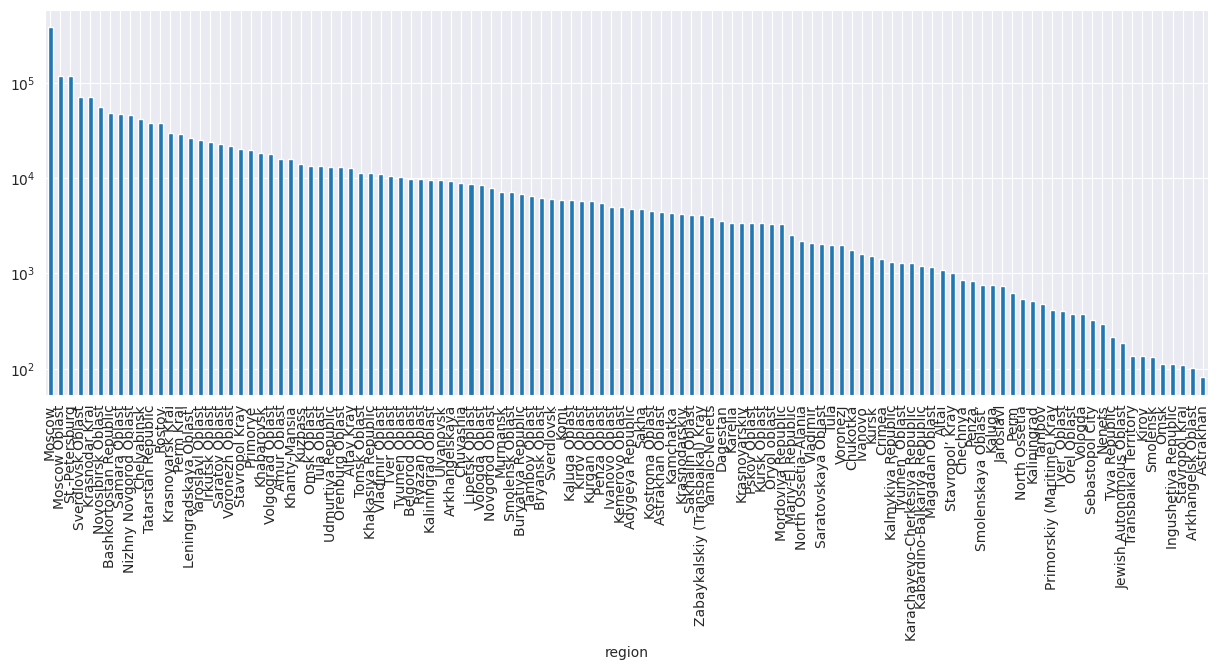

In [107]:
plt.figure(figsize = (15,5))
plt.yscale('log');
data_video['region'].value_counts().plot.bar()

<Axes: xlabel='category'>

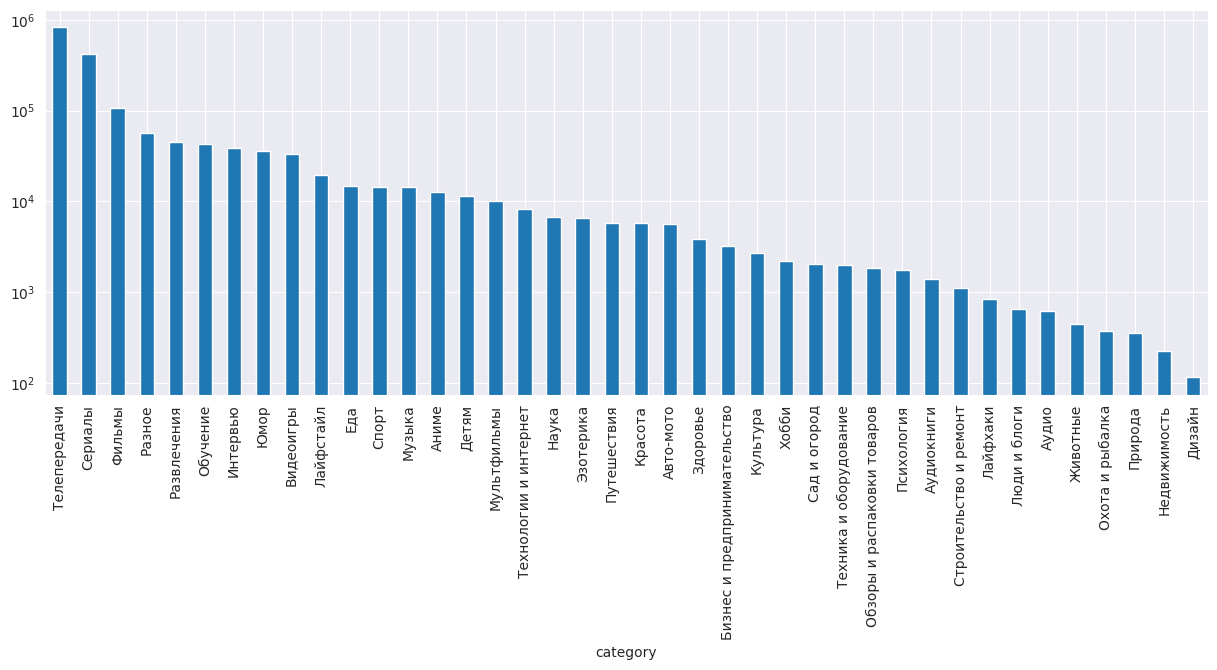

In [98]:
plt.figure(figsize = (15,5))
plt.yscale('log');
data_video['category'].value_counts().plot.bar()

<ipython-input-60-40dd6af84c3a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='sex',data=data_video,palette='colorblind')


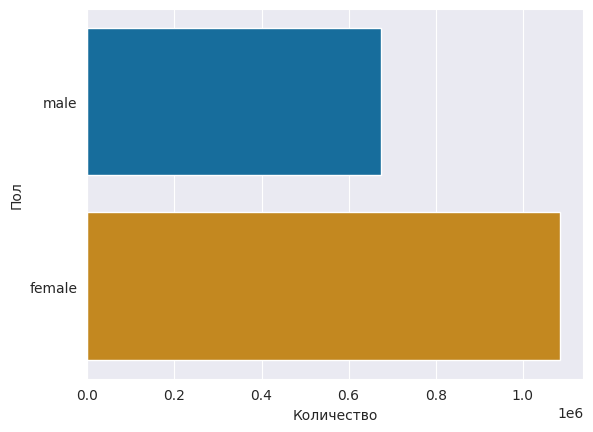

In [60]:
sns.set_style('darkgrid')
sns.countplot(y='sex',data=data_video,palette='colorblind')
plt.xlabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ')
plt.ylabel('–ü–æ–ª')
plt.show()

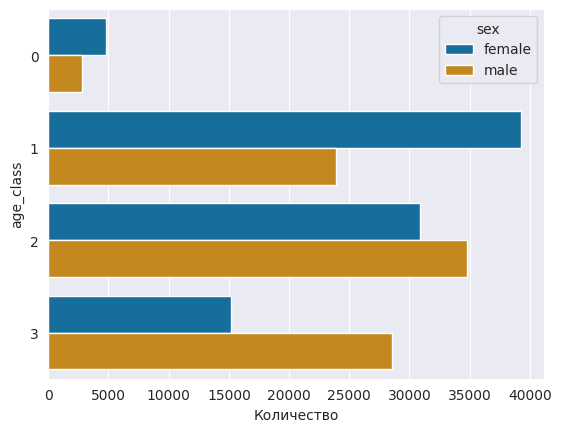

In [61]:
sns.set_style('darkgrid')
sns.countplot(y='age_class',data=targets,palette='colorblind',hue ='sex')
plt.xlabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ')
plt.ylabel('age_class')
plt.show()

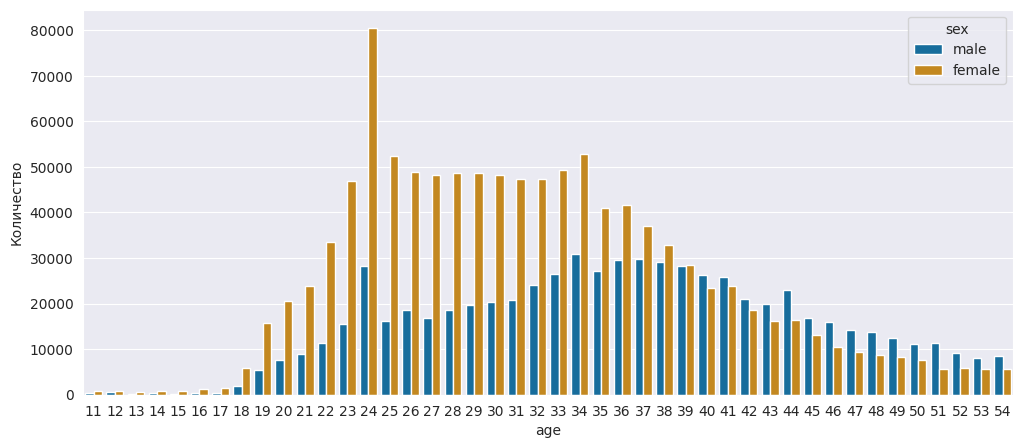

In [91]:
plt.figure(figsize = (12,5))
sns.set_style('darkgrid')
sns.countplot(x='age',data=data_video,palette='colorblind',hue ='sex')
plt.ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ')
plt.xlabel('age')
plt.show()

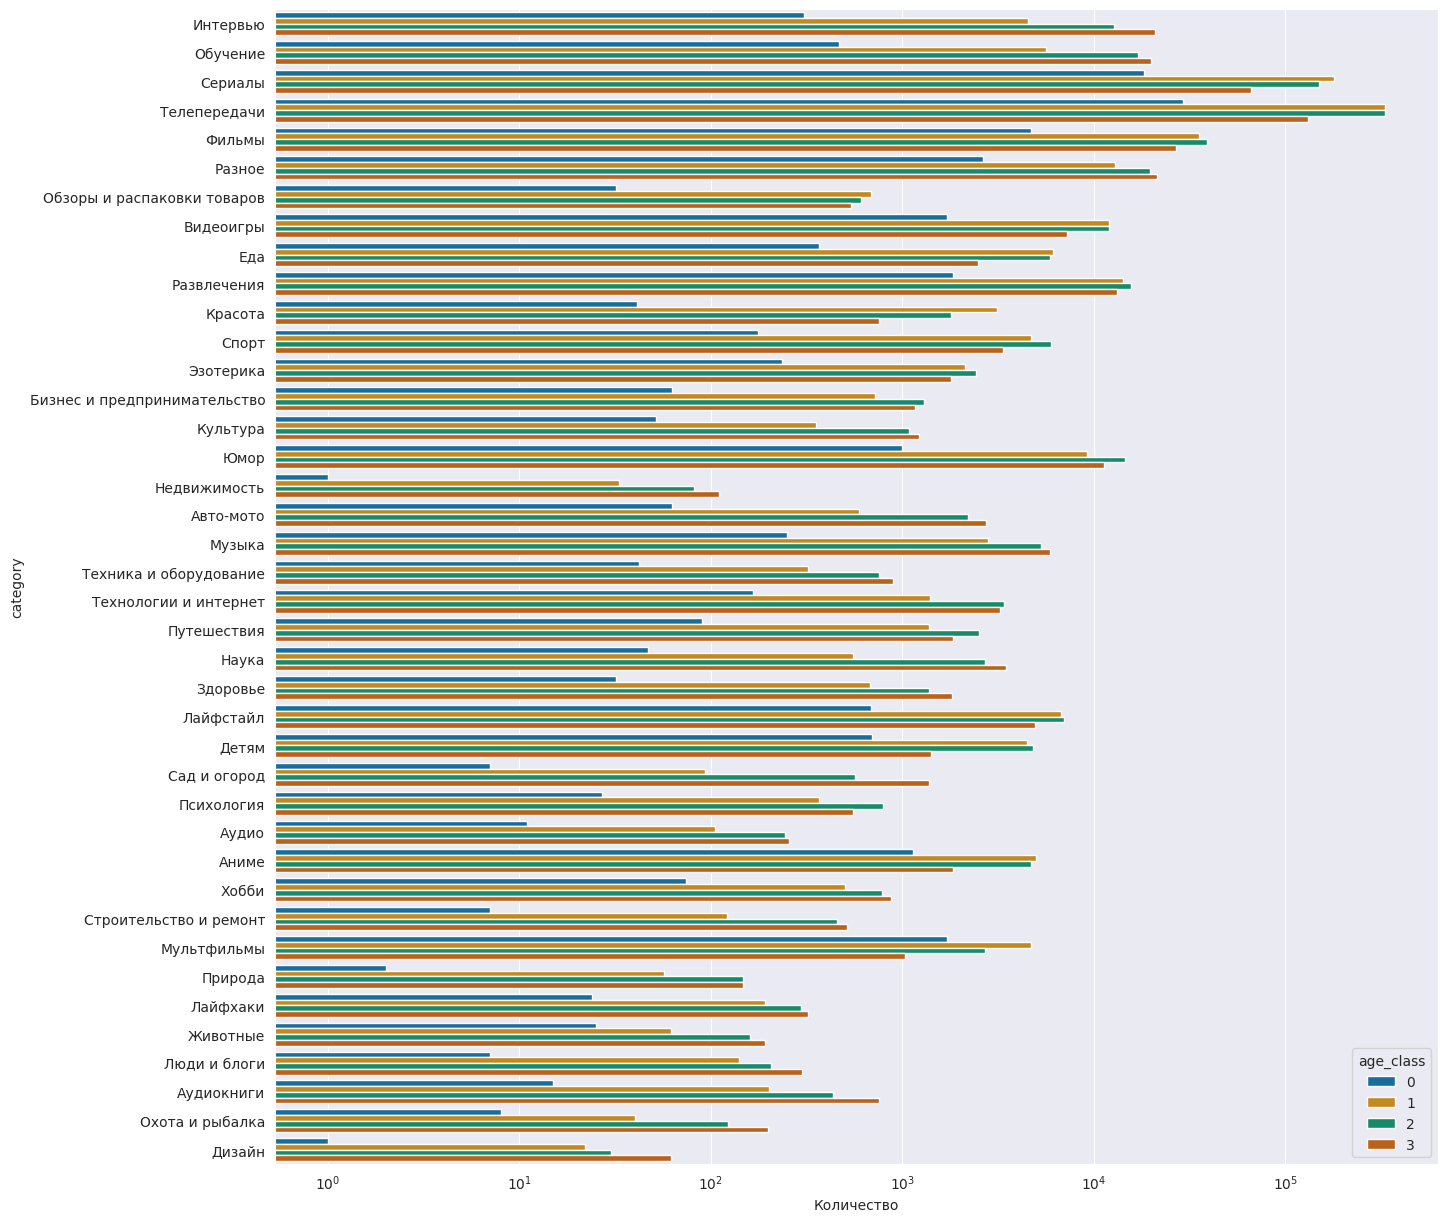

In [101]:
plt.figure(figsize = (15,15))
sns.set_style('darkgrid')
sns.countplot(y='category',data=data_video ,palette='colorblind',hue ='age_class')
plt.xlabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ')
plt.ylabel('category')
plt.xscale('log');
plt.show()

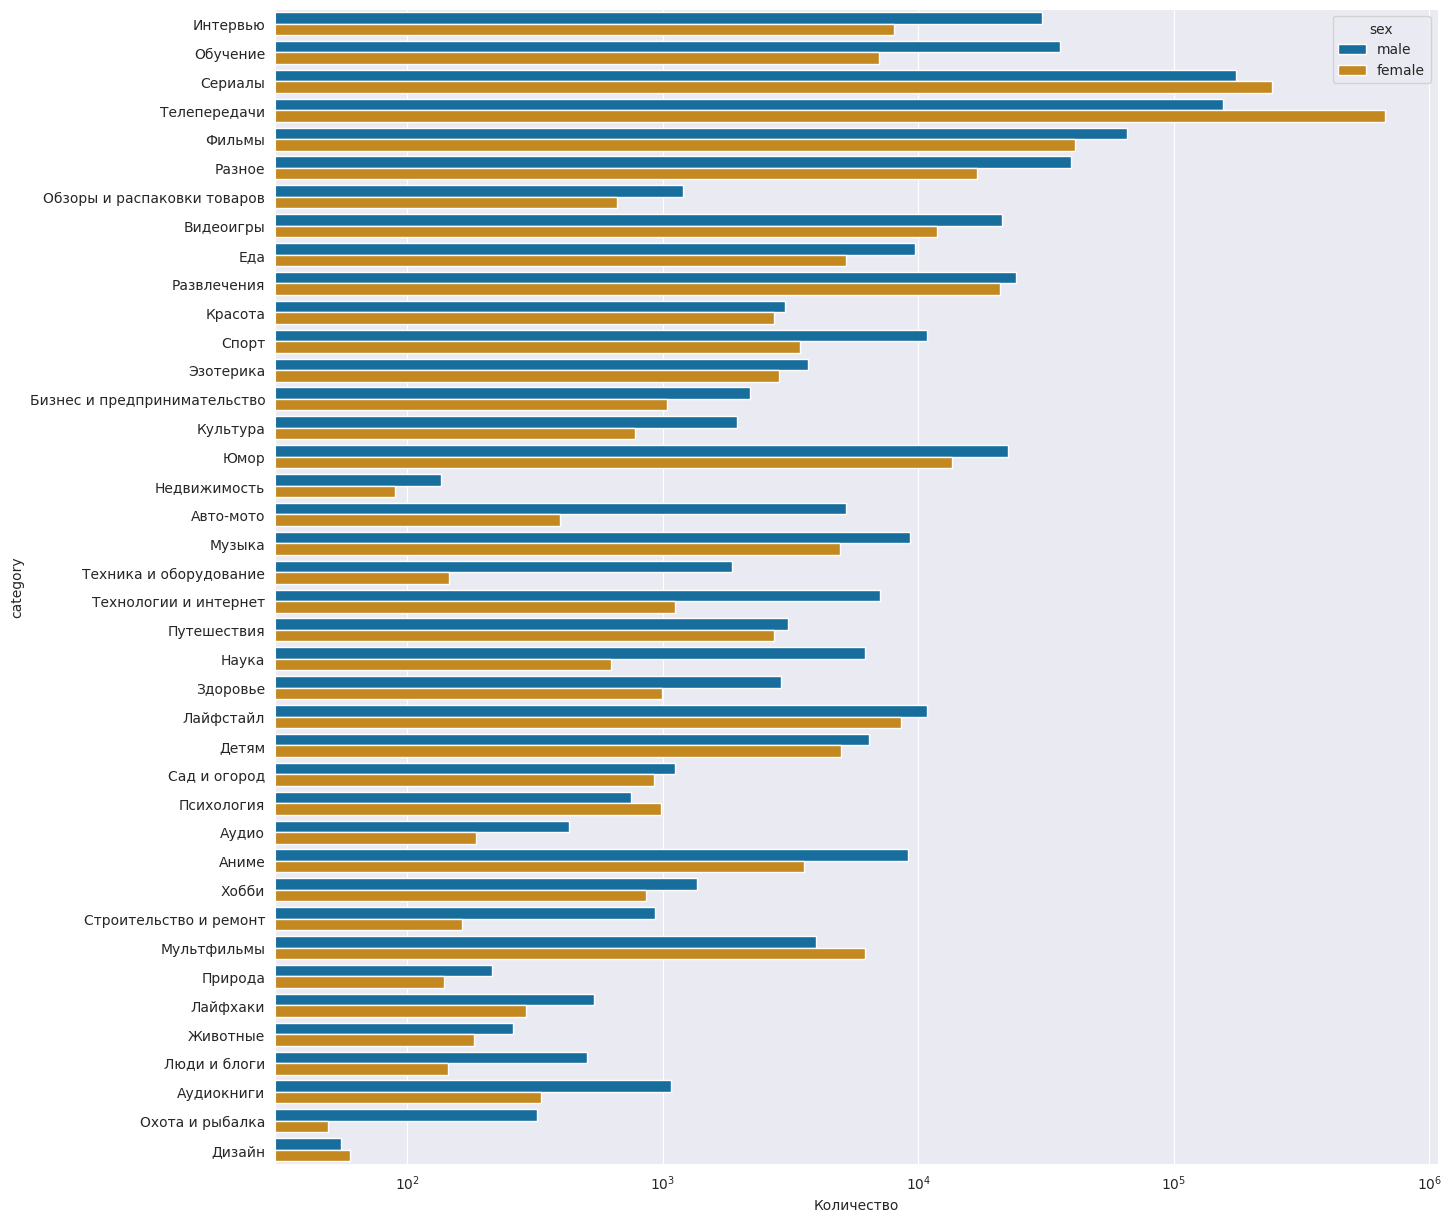

In [102]:
plt.figure(figsize = (15,15))
sns.set_style('darkgrid')
sns.countplot(y='category',data=data_video ,palette='colorblind',hue ='sex')
plt.xlabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ')
plt.ylabel('category')
plt.xscale('log');
plt.show()

In [72]:
#data_vid = data_video[(data_video['category']!= '–¢–µ–ª–µ–ø–µ—Ä–µ–¥–∞—á–∏') & (data_video['category']!= '–°–µ—Ä–∏–∞–ª—ã')]

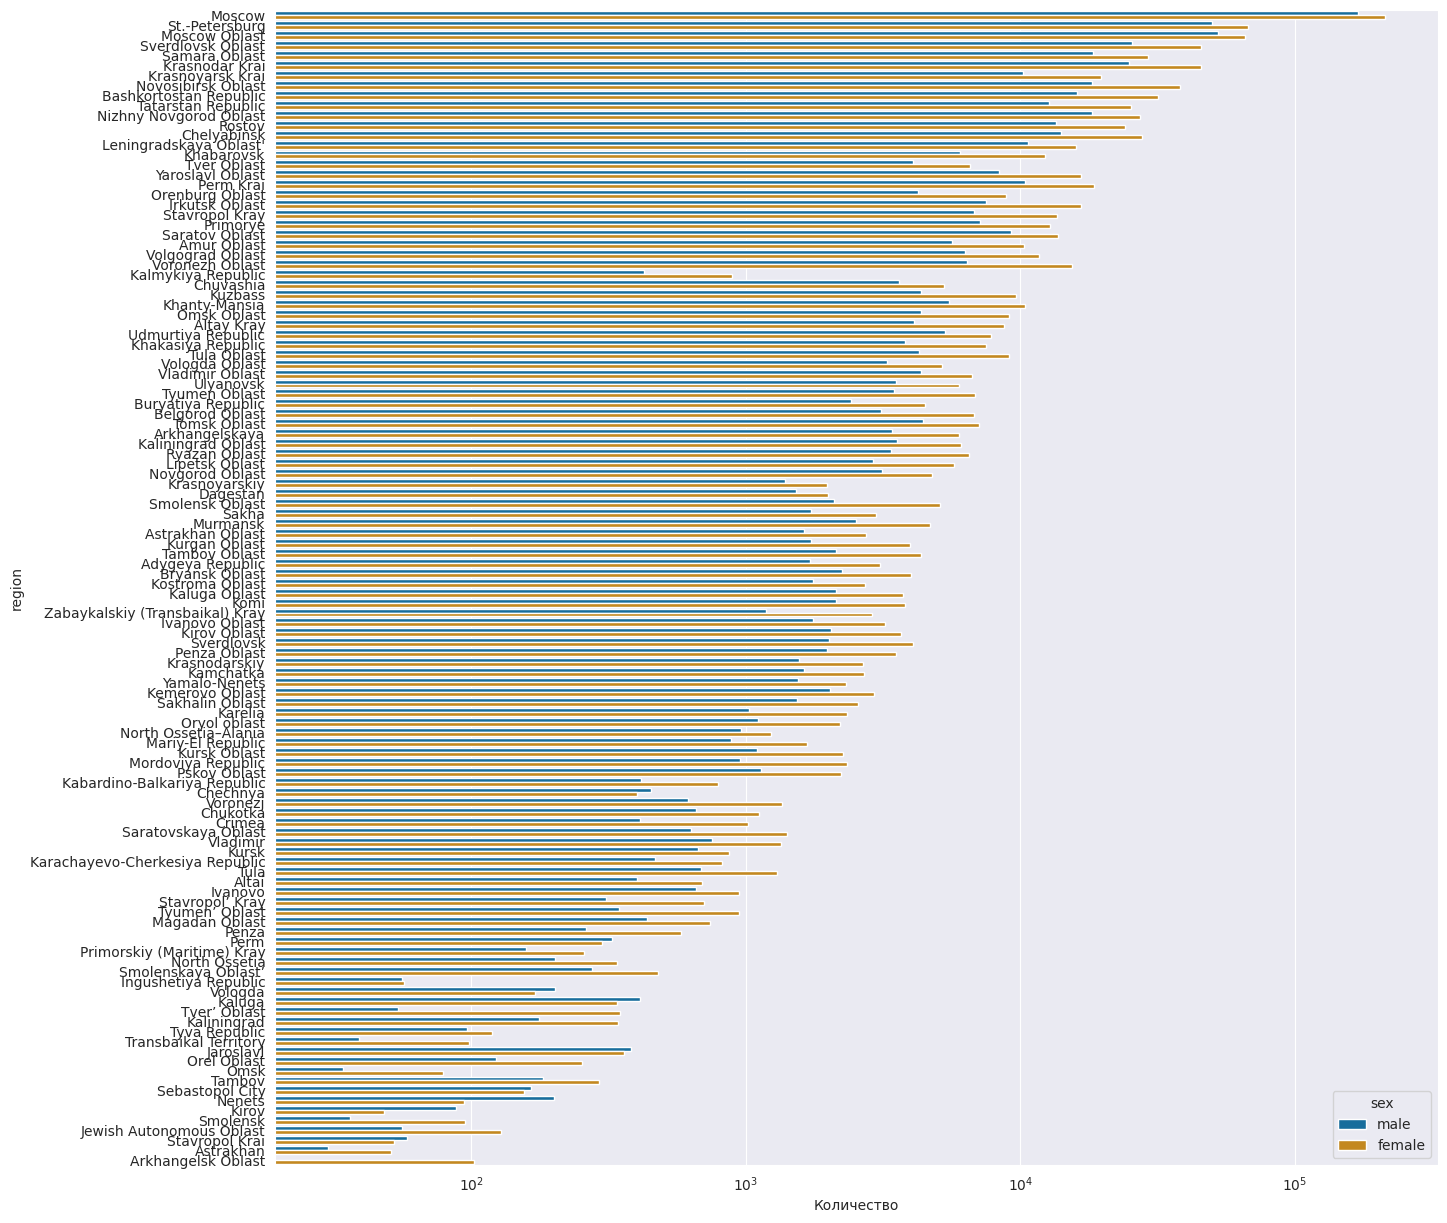

In [111]:
plt.figure(figsize = (15,15))
sns.set_style('darkgrid')
sns.countplot(y='region',data=data_video ,palette='colorblind',hue ='sex')
plt.xlabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ')
plt.ylabel('region')
plt.xscale('log');
plt.show()

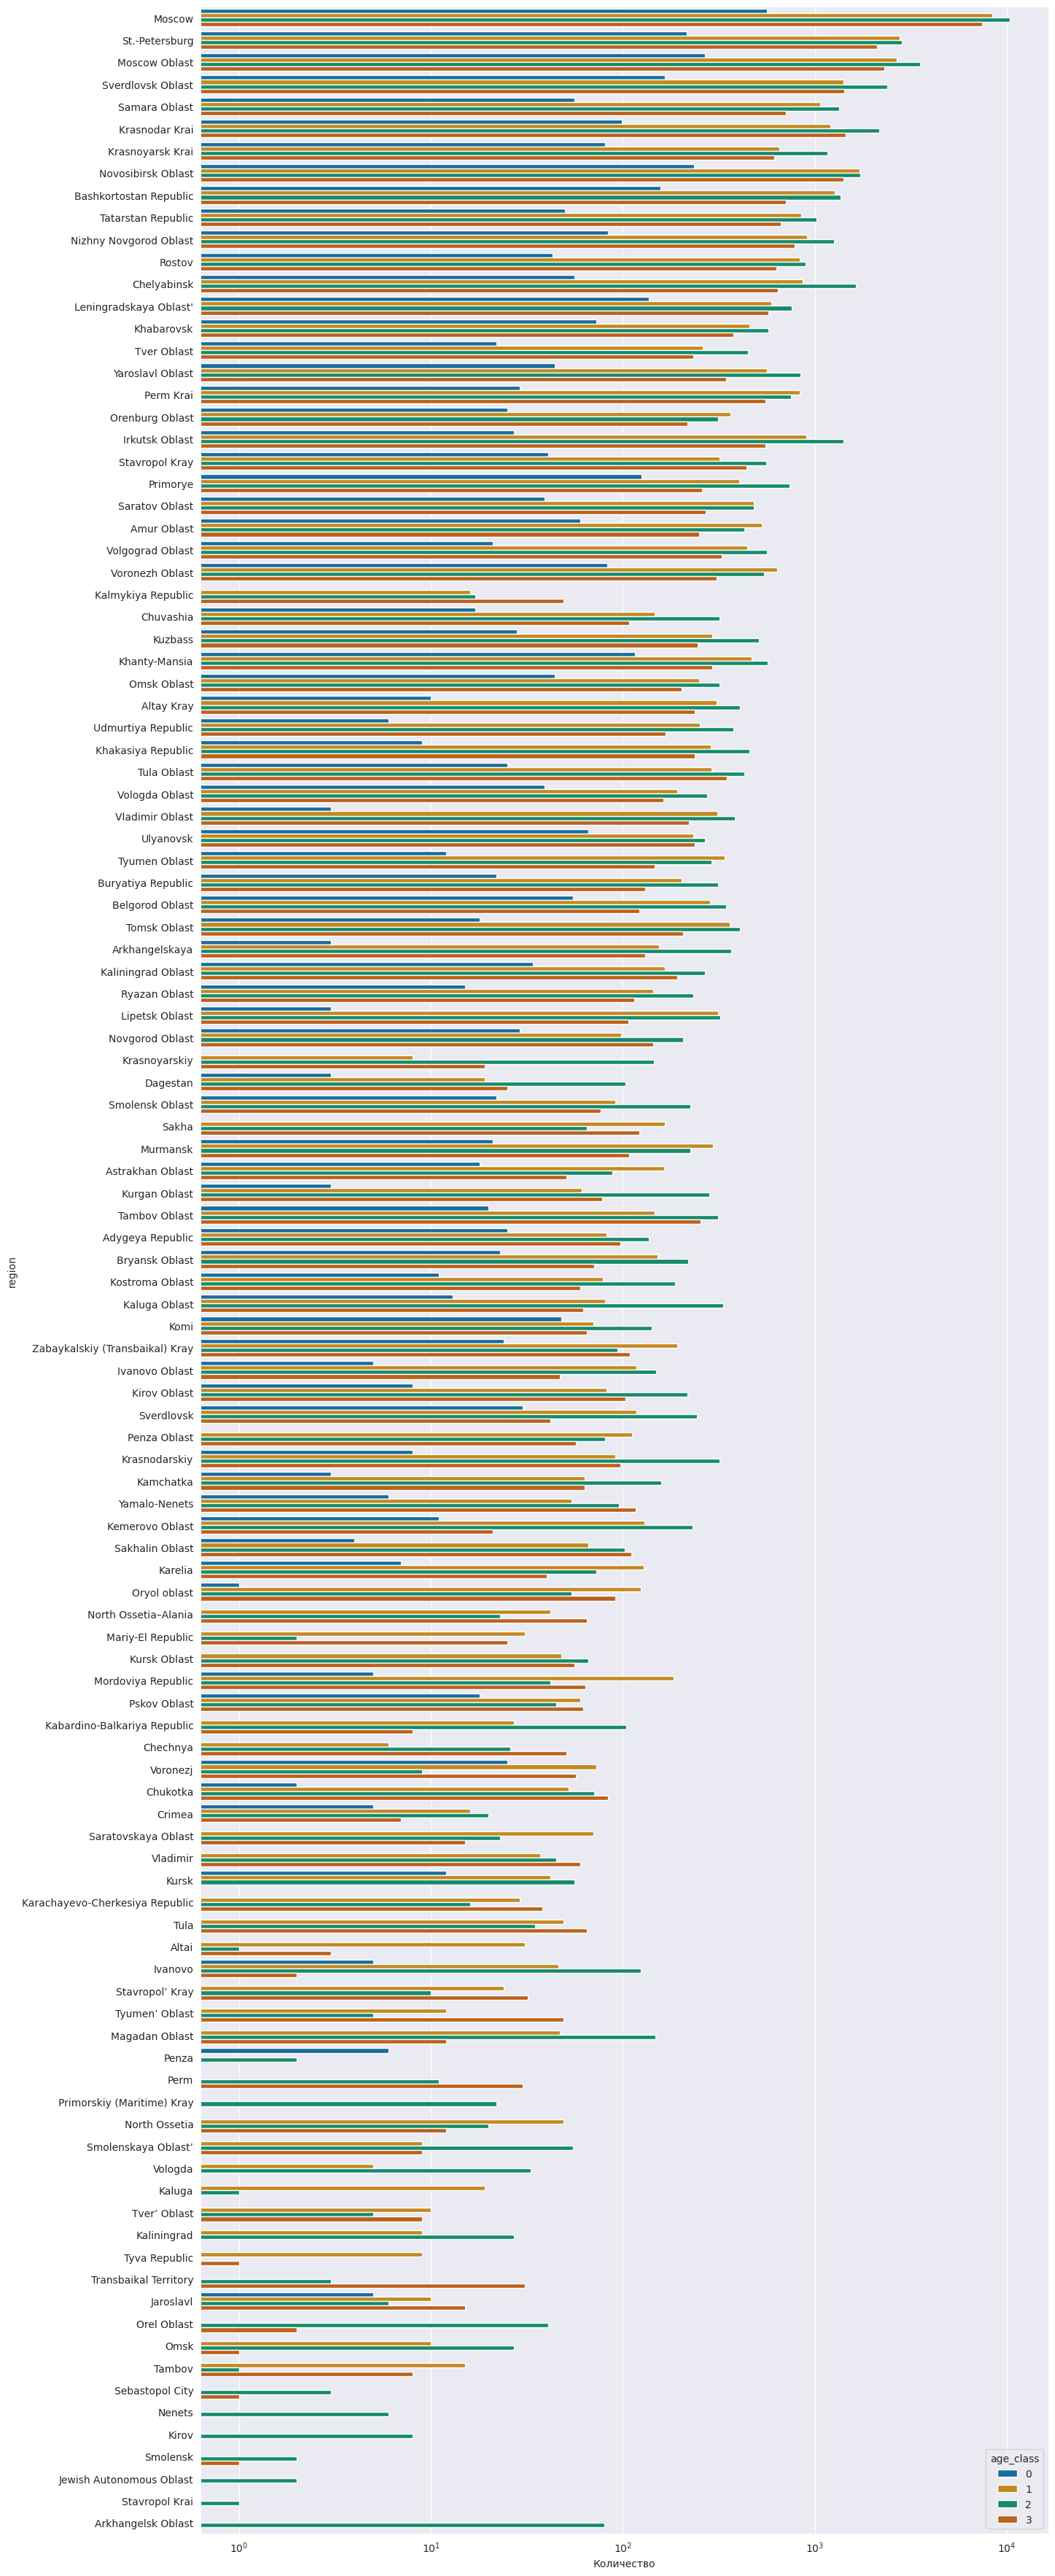

In [115]:
plt.figure(figsize = (15,45))
sns.set_style('darkgrid')
sns.countplot(y='region',data=data_vid ,palette='colorblind',hue ='age_class')
plt.xlabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ')
plt.ylabel('region')
plt.xscale('log');
plt.show()

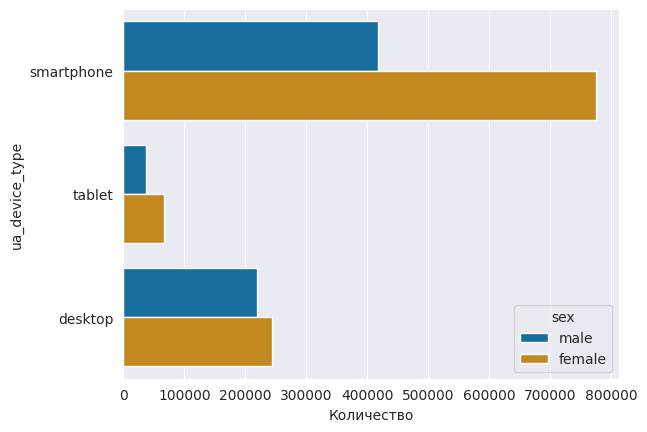

In [74]:
sns.set_style('darkgrid')
sns.countplot(y='ua_device_type',data=data_video ,palette='colorblind',hue ='sex')
plt.xlabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ')
plt.ylabel('ua_device_type')
plt.show()

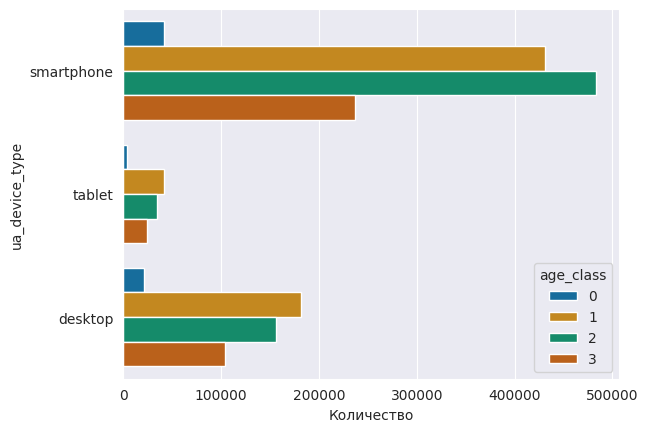

In [85]:
sns.set_style('darkgrid')
sns.countplot(y='ua_device_type',data=data_video ,palette='colorblind',hue ='age_class')
plt.xlabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ')
plt.ylabel('ua_device_type')
plt.show()

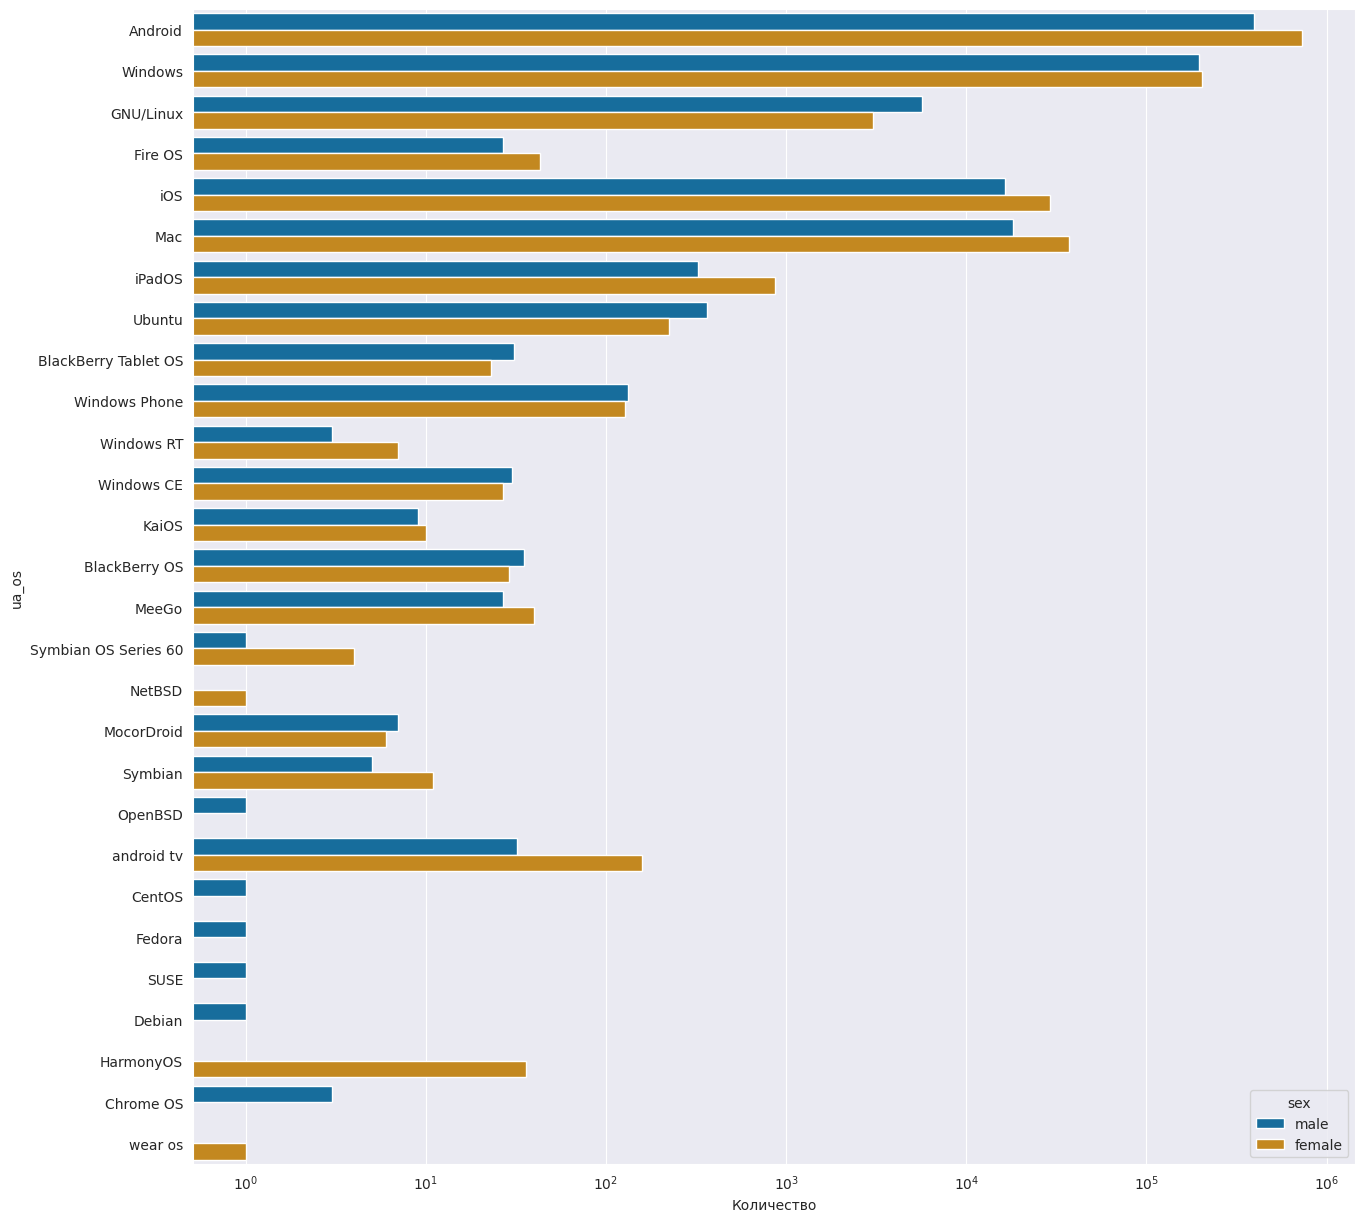

In [108]:
plt.figure(figsize = (15,15))
sns.set_style('darkgrid')
sns.countplot(y='ua_os',data=data_video ,palette='colorblind',hue ='sex')
plt.xlabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ')
plt.ylabel('ua_os')
plt.xscale('log');
plt.show()

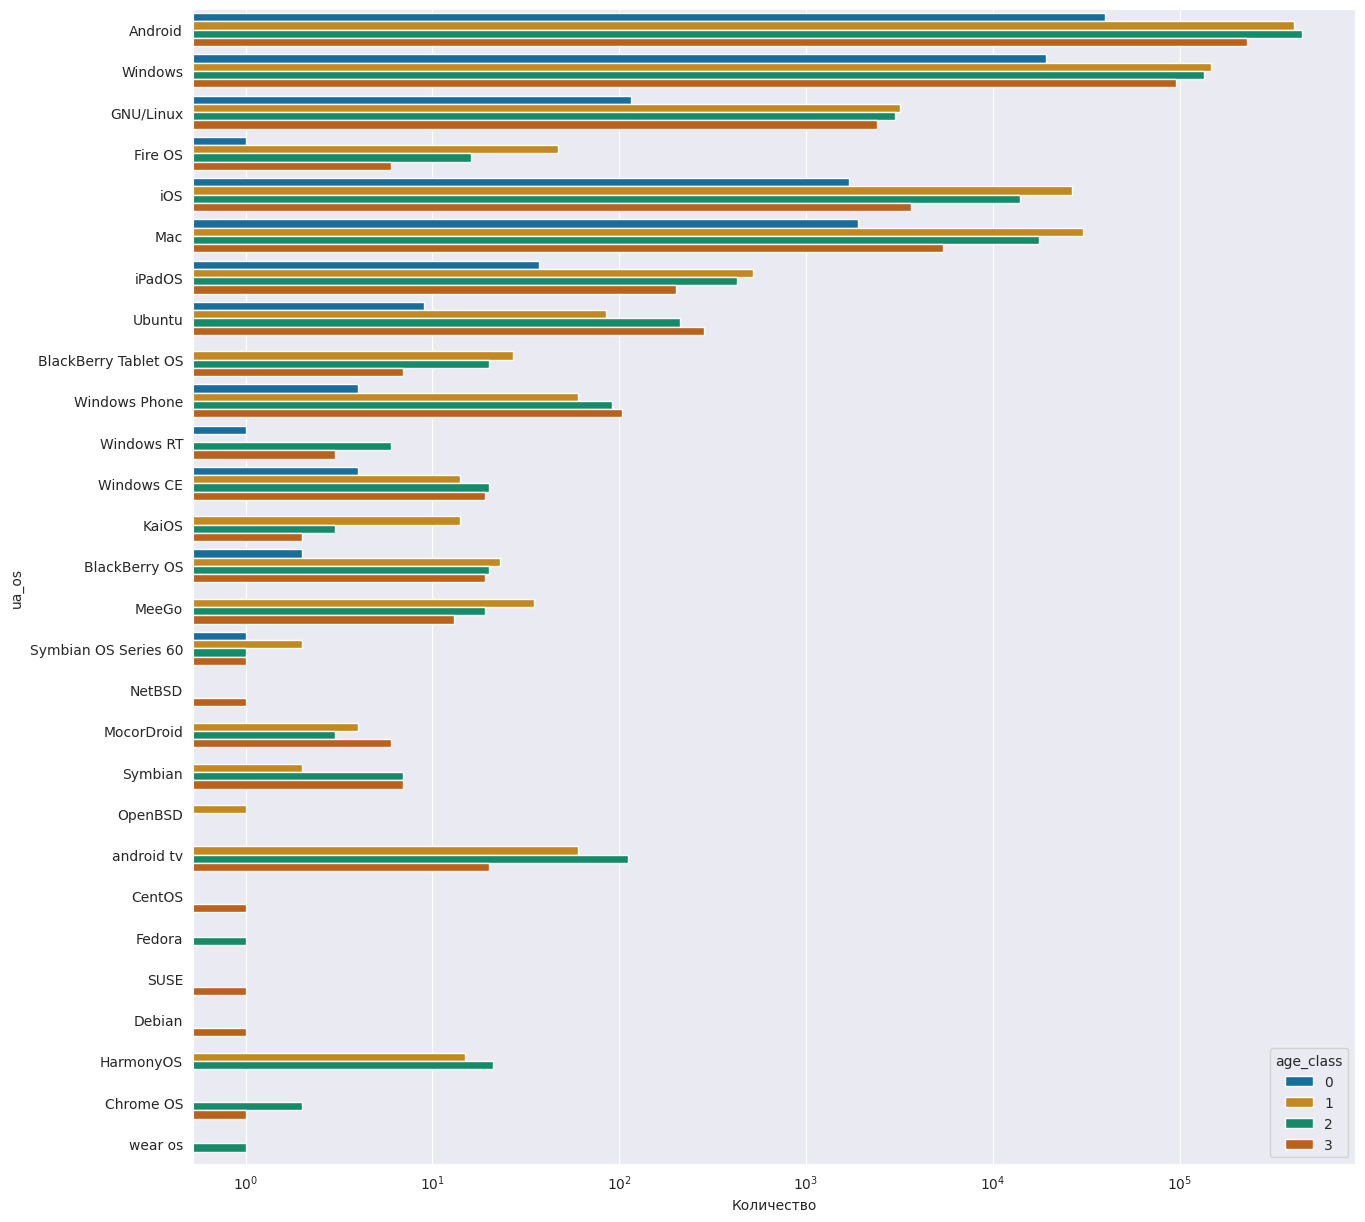

In [109]:
plt.figure(figsize = (15,15))
sns.set_style('darkgrid')
sns.countplot(y='ua_os',data=data_video ,palette='colorblind',hue ='age_class')
plt.xlabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ')
plt.ylabel('ua_os')
plt.xscale('log');
plt.show()

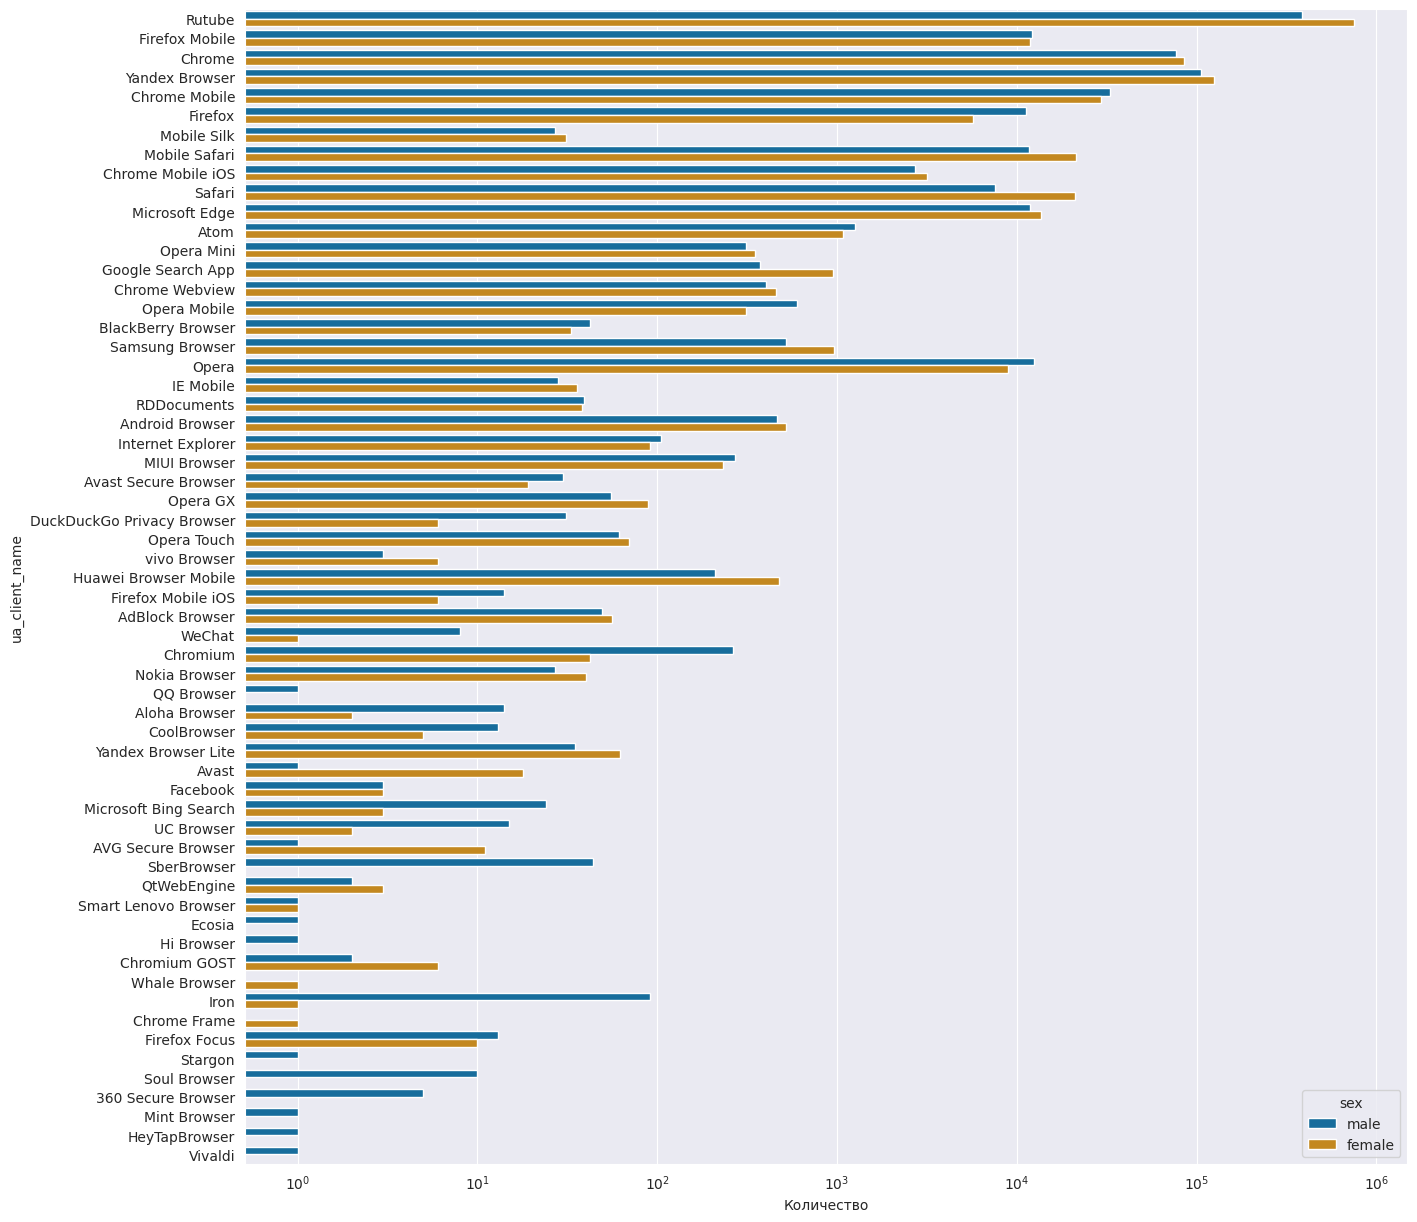

In [117]:
plt.figure(figsize = (15,15))
sns.set_style('darkgrid')
sns.countplot(y='ua_client_name',data=data_video ,palette='colorblind',hue ='sex')
plt.xlabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ')
plt.ylabel('ua_client_name')
plt.xscale('log');
plt.show()

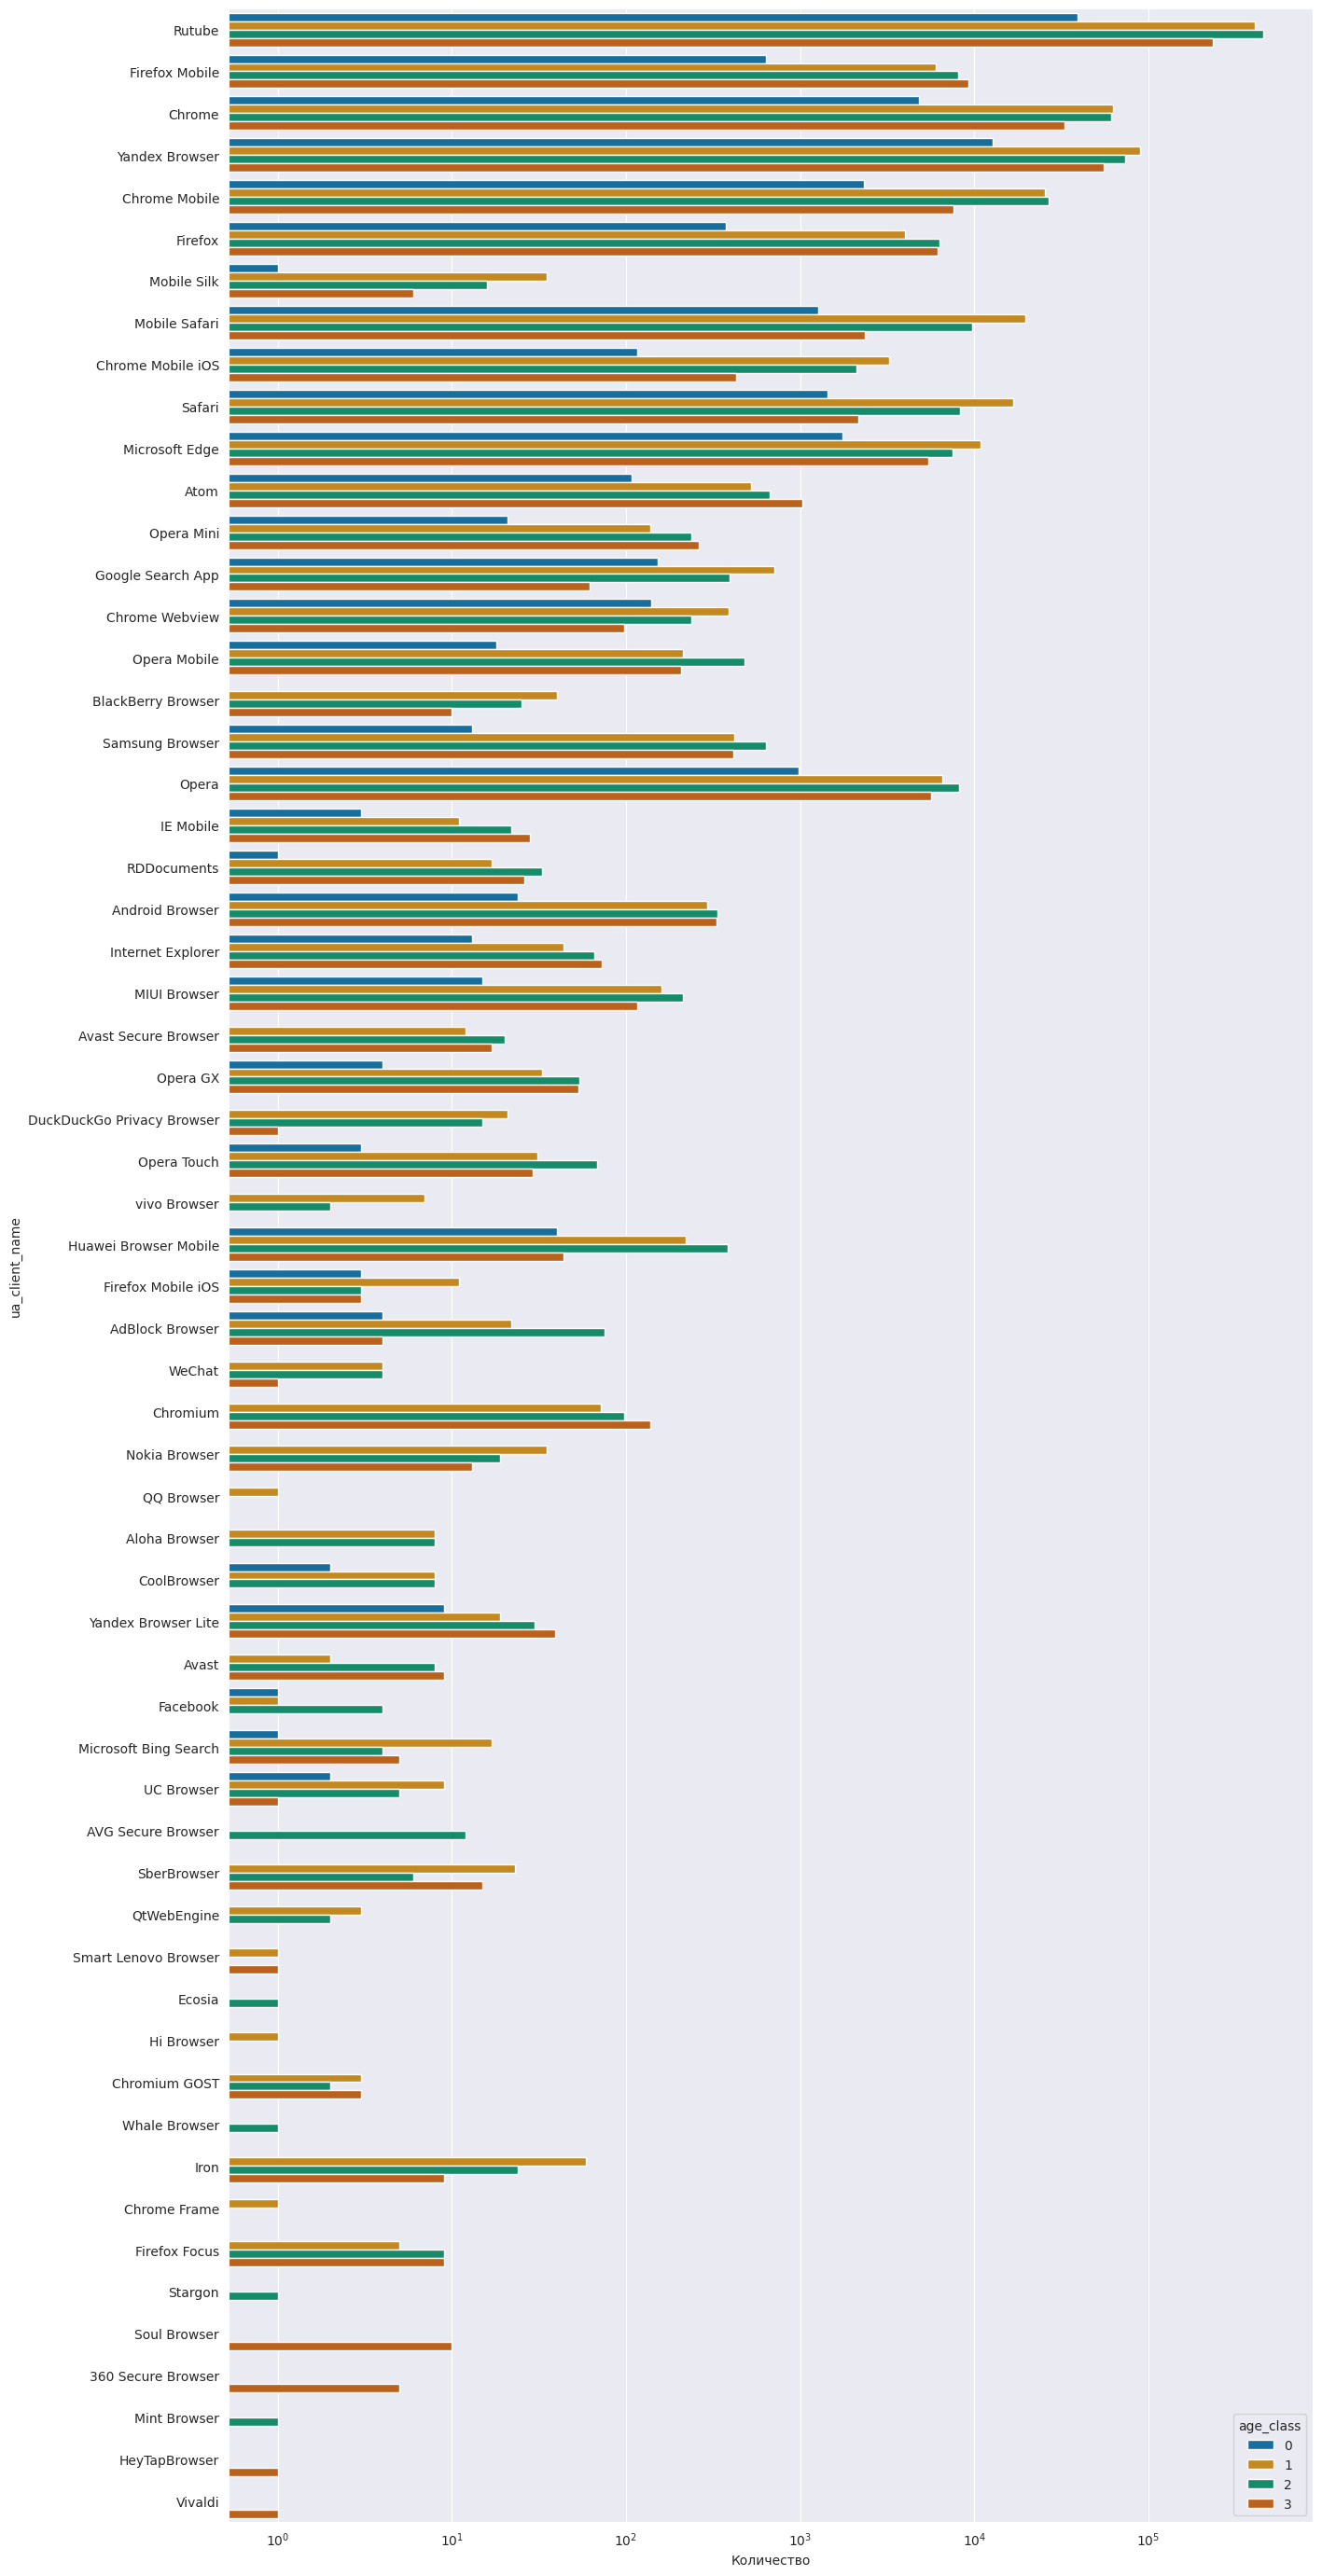

In [118]:
plt.figure(figsize = (15,35))
sns.set_style('darkgrid')
sns.countplot(y='ua_client_name',data=data_video ,palette='colorblind',hue ='age_class')
plt.xlabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ')
plt.ylabel('ua_client_name')
plt.xscale('log');
plt.show()

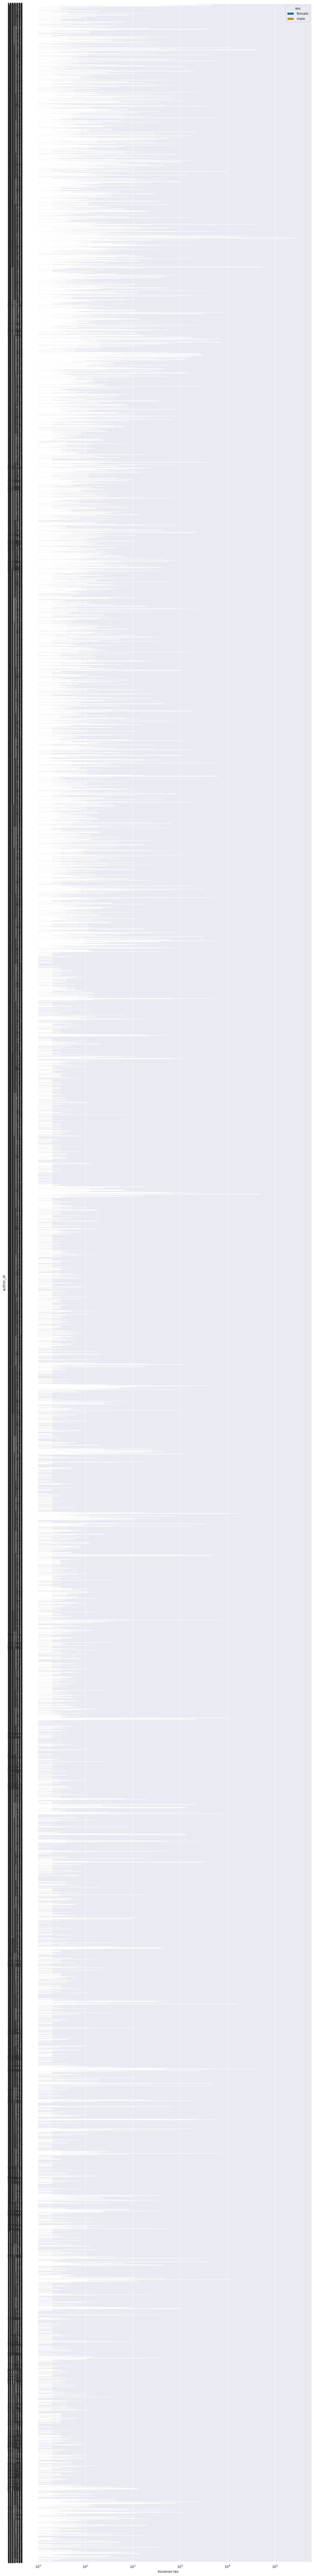

In [120]:
plt.figure(figsize = (15,135))
sns.set_style('darkgrid')
sns.countplot(y='author_id',data=data_video ,palette='colorblind',hue ='sex')
plt.xlabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ')
plt.ylabel('author_id')
plt.xscale('log');
plt.show()

In [ ]:
plt.figure(figsize = (15,15))
sns.set_style('darkgrid')
sns.countplot(y='category',data=data_video ,palette='colorblind',hue = 'sex'  #'age_class')
plt.xlabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ')
plt.ylabel('category')
plt.xscale('log');
plt.show()

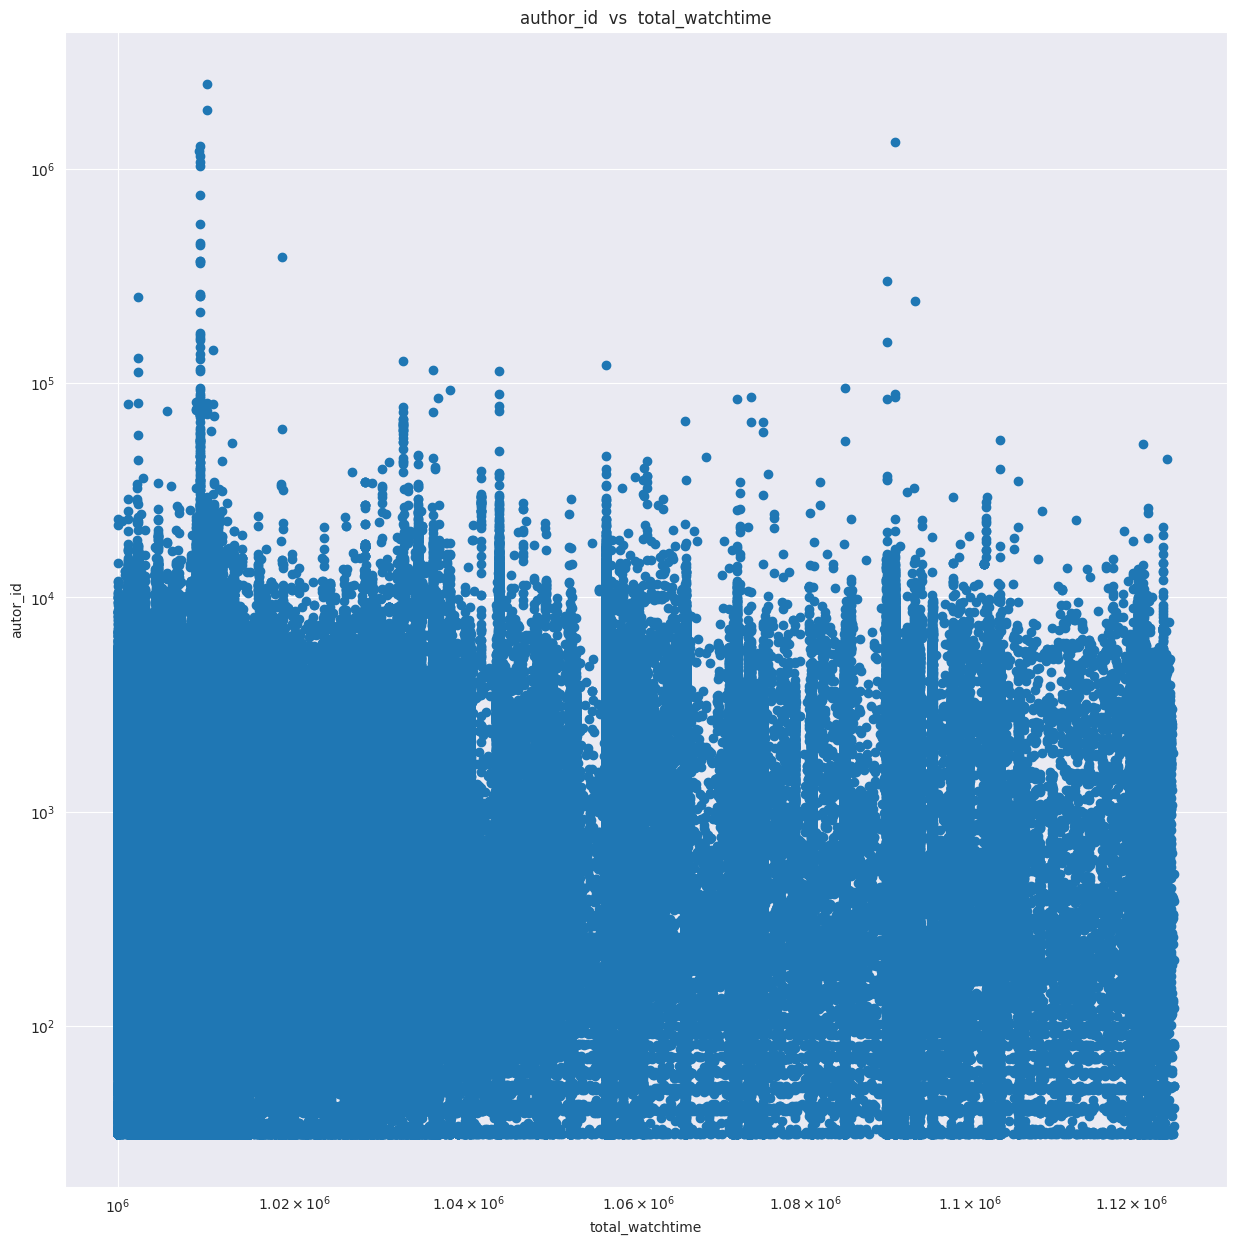

In [126]:
plt.figure(figsize = (15,15))
plt.scatter(data_video.author_id, data_video.total_watchtime)
plt.xlabel('total_watchtime')
plt.ylabel('autor_id')
plt.yscale('log');
plt.xscale('log');
plt.title('author_id  vs  total_watchtime');

In [ ]:
plt.figure(figsize = (15,15))
plt.scatter(data_video.author_id, data_video.total_watchtime)
plt.xlabel('total_watchtime')
plt.ylabel('categoryautor_id')
plt.yscale('log');
plt.title('author_id  vs  total_watchtime');

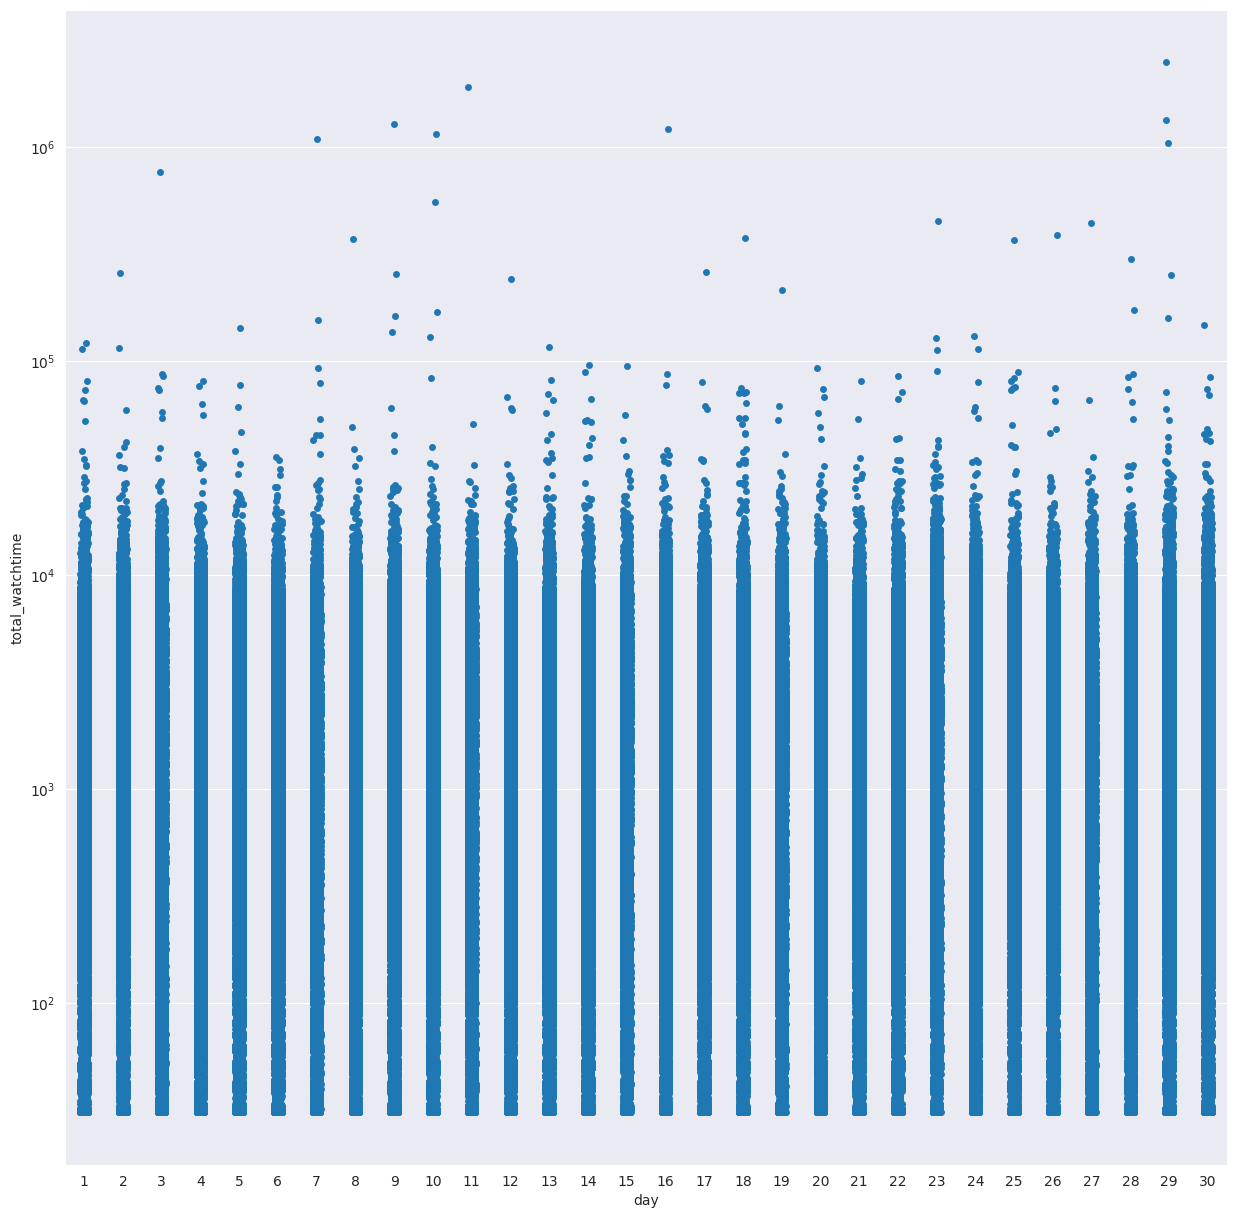

In [128]:
plt.figure(figsize = (15,15))
plt.yscale('log');
sns.stripplot(x = 'day', y = 'total_watchtime', data = data_video);

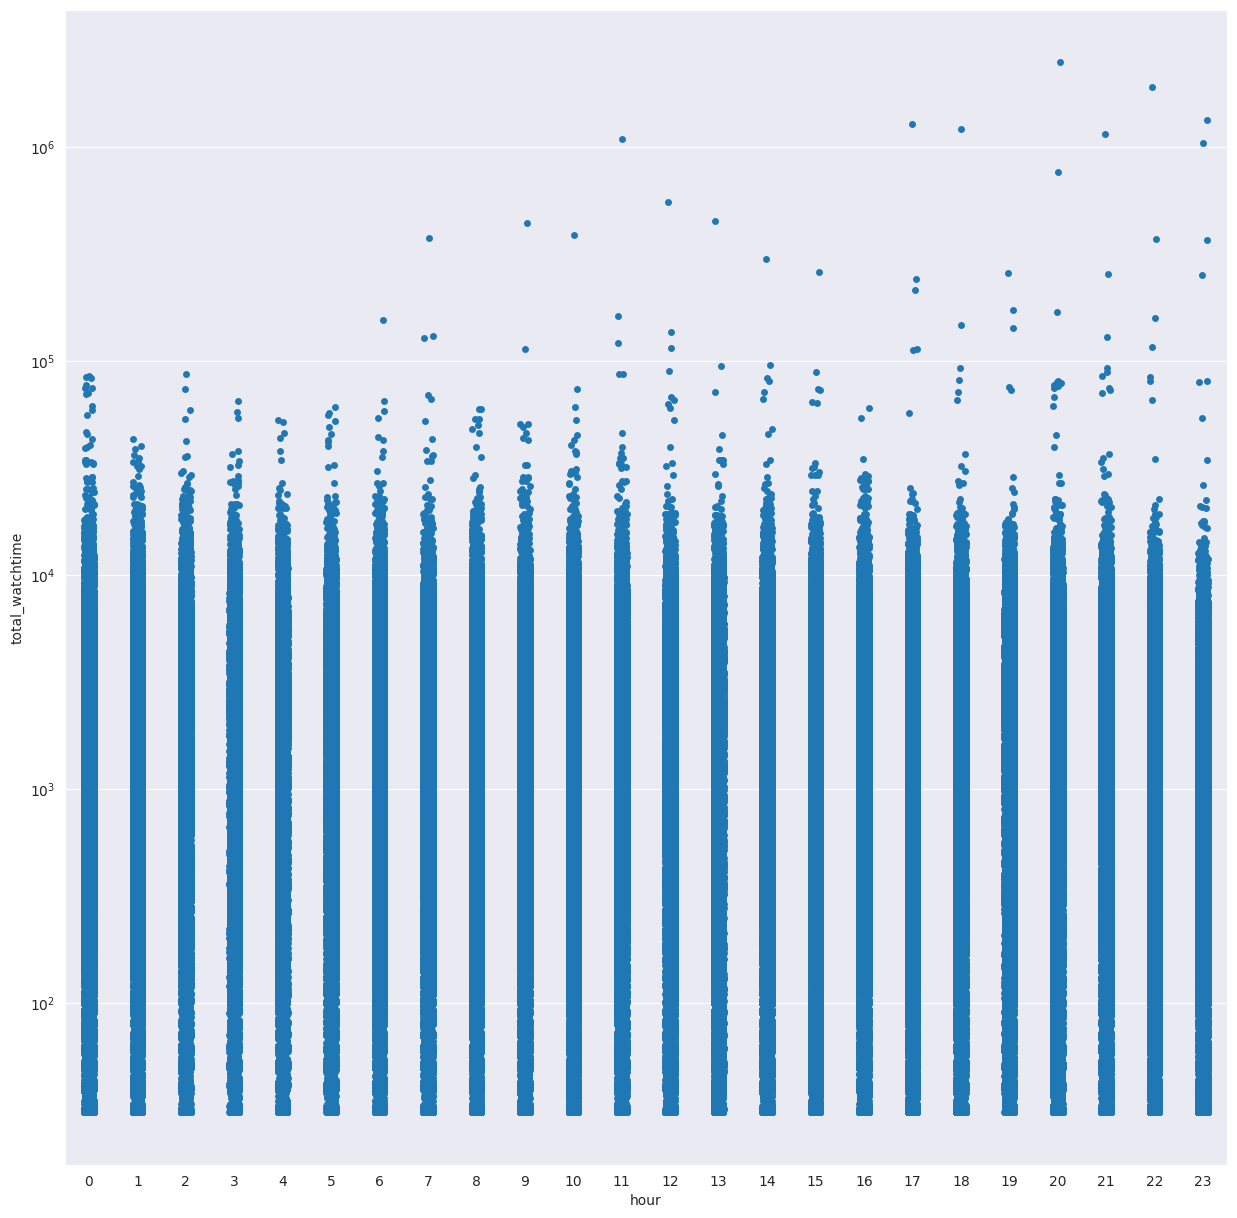

In [129]:
plt.figure(figsize = (15,15))
plt.yscale('log');
sns.stripplot(x = 'hour', y = 'total_watchtime', data = data_video);

In [83]:
data_video.corr()

ValueError: could not convert string to float: 'male'

In [ ]:
grid = sns.FacetGrid(dataframe, col="Region", hue="Region", col_wrap=5)
grid.map(sns.scatterplot, "Economy (GDP per Capita)", "Health (Life Expectancy)")
grid.add_legend();    #https://pythonru.com/biblioteki/seaborn-plot

In [ ]:
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

df = pd.read_csv('Downloads/2016.csv')

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = df['Happiness Score']
y = df['Economy (GDP per Capita)']
z = df['Health (Life Expectancy)']

ax.set_xlabel("–°—á–∞—Å—Ç—å–µ")
ax.set_ylabel("–≠–∫–æ–Ω–æ–º–∏–∫–∞")
ax.set_zlabel("–ó–¥–æ—Ä–æ–≤—å–µ")

ax.scatter(x, y, z)

plt.show()

In [ ]:
FFMC = dataframe["FFMC"]
DMC = dataframe["DMC"]
DC = dataframe["DC"]
RH = dataframe["RH"]
ISI = dataframe["ISI"]
temp = dataframe["temp"]

In [ ]:
sns.boxplot(x=DMC);

In [ ]:
sns.boxplot(x=dataframe["day"], y=DMC);

In [ ]:

–ö–û–ü–ò–†–û–í–ê–¢–¨
df = pd.DataFrame(data=dataframe, columns=["FFMC", "DMC", "DC", "ISI"])
sns.boxplot(x="variable", y="value", data=pd.melt(df));

In [ ]:
data_df['model'].unique()


array(['HGST HDS5C4040ALE630', 'HGST HMS5C4040BLE640',
       'TOSHIBA MQ01ABF050M', 'HGST HMS5C4040ALE640', 'WDC WD5000LPVX',
       'ST4000DM000', 'CT250MX500SSD1', 'ST500LM012 HN',
       'HGST HUS726040ALE610', 'Hitachi HDS5C4040ALE630', 'Seagate SSD',
       'WDC WD5000BPKT', 'ST16000NM001G',
       'Seagate BarraCuda SSD ZA250CM10002', 'WDC WD60EFRX',
       'ST6000DX000', 'ST500LM030', 'ST6000DM001', 'ST8000DM002',
       'TOSHIBA HDWE160', 'Seagate BarraCuda SSD ZA500CM10002',
       'ST6000DM004', 'TOSHIBA MQ01ABF050', 'ST4000DM005', 'ST4000DM004',
       'Seagate BarraCuda 120 SSD ZA250CM10003', 'TOSHIBA MD04ABA400V',
       'WDC WDS250G2B0A', 'ST8000NM0055', 'WD Blue SA510 2.5 250GB',
       'Seagate BarraCuda SSD ZA2000CM10002', 'HGST HMS5C4040BLE641',
       'HGST HDS724040ALE640', 'HGST HUH728080ALE600', 'ST8000DM005',
       'HGST HUH728080ALE604', 'ST8000NM000A', 'WDC WD5000LPCX',
       'HGST HUS728T8TALE6L4', 'ST10000NM001G', 'ST10000NM0086',
       'Seagate FireCuda 